# Comparison between "Comprehensive upper-air observation network from 1905 to present" and "Insitu IGRA radiosoundings baseline network"

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to find differences in both mentioned data sets and to compare them. 

    Author: U. Voggenberger
    Date: 02.2021
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2021


In [1]:
import pandas
import numpy as np
import sys, zipfile, os, time
import matplotlib.pyplot as plt
import glob
import datetime
import urllib3
import cdsapi
import xarray
import shutil
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [3]:
def request(rqdict, source, remove_file=True):
    t0 = time.time()

    c = cdsapi.Client()
    r = c.retrieve(
        source,rqdict)
    if True:
        r.download(target='download.zip')
        assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./download/')
    z.close()
    print('Request took: ' + str(time.time() - t0) + ' seconds')
    
    files = glob.glob('./download/*.nc')
    
    if files[0].split('/')[-1].startswith('IGRA'):
        ds = xarray.open_dataset(files[0])            
        data = ds.to_dataframe()
        for i in files[1:]:
            ds = xarray.open_dataset(i)            
            data = data.append(ds.to_dataframe())

    else:
        data=eua.CDMDataset(files[0]).to_dataframe()
        for i in files[1:]:
            da = eua.CDMDataset(i).to_dataframe()
            data = data.append(da)
            
    os.remove('download.zip')
    if remove_file:
        try:
           shutil.rmtree('./download/')
        except:
           print('Error while deleting directory')

    return data

---

# Analyzing and comparing temperature values for IGRA (and its harmonized version) and Comprehensive upper-air observation network (CUON)
# Hilo 91285

In [4]:
loc = '91285'

---

## Loading Data:

The loading of the data shows if there is any differance in the retreival performance.

In [5]:
cuon = 'insitu-comprehensive-upper-air-observation-network'
igra = 'insitu-observations-igra-baseline-network'

# CUON
## Requesting the whole temperature data of Hilo:
### Request took: 94 seconds
### 1950-02-18 17:00:00 - 2020-12-31 11:03:47 -> 10346190 messurements

In [6]:
cachworkaround = np.random.random_sample()
da_c = request({
    'variable': 'temperature',
    'statid': '91285',
#     'date': '20000101-20100101',
    'optional': ['bias_estimate','obs_minus_an','obs_minus_bg'],
    'cachworkaround': cachworkaround,
}, cuon)

2021-02-16 11:28:54,427 INFO Welcome to the CDS
2021-02-16 11:28:54,428 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-02-16 11:28:54,648 INFO Request is queued
2021-02-16 11:28:55,684 INFO Request is running
2021-02-16 11:30:09,923 INFO Request is completed
2021-02-16 11:30:09,924 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1613471394.0584397-20882-6-d74ef2df-8700-42c1-80c5-2ddffdf5420c.zip to download.zip (343.3M)
2021-02-16 11:30:27,987 INFO Download rate 19M/s   


Request took: 94.35233449935913 seconds
2021-02-16 11:30:28,634 - upperair.cdm | __init__ - DEBUG - [OPEN] ./download/dest_0-20000-0-91285_air_temperature.nc


2021-02-16 11:30:28,634 DEBUG [OPEN] ./download/dest_0-20000-0-91285_air_temperature.nc


2021-02-16 11:30:28,667 - upperair.cdm | to_dataframe - INFO - Reading Profile on slice(None, None, None)


2021-02-16 11:30:28,667 INFO Reading Profile on slice(None, None, None)


2021-02-16 11:30:31,668 - upperair.cdm | to_dataframe - DEBUG - Read variables: dict_keys(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg', 'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


2021-02-16 11:30:31,668 DEBUG Read variables: dict_keys(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg', 'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


In [7]:
da_c

bias_estimate        lat         lon  obs  obs_minus_an  \
0             -0.533300  19.730000 -155.070007    0      0.529345   
1             -0.138718  19.730000 -155.070007    0     -0.371630   
2             -0.395922  19.730000 -155.070007    0     -1.977807   
3             -0.409695  19.730000 -155.070007    0     -0.068597   
4              0.058831  19.730000 -155.070007    0     -0.036048   
...                 ...        ...         ...  ...           ...   
10346185       0.030000  19.717251 -155.049393    0     -2.562939   
10346186       0.030000  19.717251 -155.049393    0     -2.656118   
10346187       0.030000  19.717251 -155.049393    0     -2.779282   
10346188       0.030000  19.717251 -155.049393    0     -2.872429   
10346189       0.030000  19.717251 -155.049393    0     -2.935561   

          obs_minus_bg      plev    report_id       station_id          ta  \
0             0.473839   30000.0  20000000168  HILO HI, HAWAII  237.250000   
1            -0.465199   40000.0  20000000168  HILO HI, HAWAII  252.850006   
2            -2.274287   50000.0  20000000168  HILO HI, HAWAII  260.250000   
3             0.039896   70000.0  20000000168  HILO HI, HAWAII  276.649994   
4             0.533887   85000.0  20000000168  HILO HI, HAWAII  284.549988   
...                ...       ...          ...              ...         ...   
10346185     -2.035666  101640.0  10000037418  HILO HI, HAWAII  292.940002   
10346186     -2.128786  101700.0  10000037418  HILO HI, HAWAII  292.880005   
10346187     -2.251890  101760.0  10000037418  HILO HI, HAWAII  292.790009   
10346188     -2.344979  101820.0  10000037418  HILO HI, HAWAII  292.730011   
10346189     -2.408051  101880.0  10000037418  HILO HI, HAWAII  292.700012   

                        time trajectory_label  
0        1950-02-18 17:00:00      30000000001  
1        1950-02-18 17:00:00      30000000002  
2        1950-02-18 17:00:00      30000000002  
3        1950-02-18 17:00:00      30000000002  
4        1950-02-18 17:00:00      30000000002  
...                      ...              ...  
10346185 2020-12-31 11:03:47      30000000001  
10346186 2020-12-31 11:03:47      30000000001  
10346187 2020-12-31 11:03:47      30000000001  
10346188 2020-12-31 11:03:47      30000000001  
10346189 2020-12-31 11:03:47      30000000001  

[10346190 rows x 12 columns]

# IGRA
## Requesting the whole temperature data of Hilo:
### Request took: 620 seconds
### 1978-04-01 00:00:00 - 2020-04-13 12:00:00 -> 3918252 messurements

In [8]:
da_i = request({
    'source': 'IGRA',
    'variable': ['air_temperature'],
    'station_name': ['USM00091285'],
    'period': '1978-01-01/2020-12-31',
}, igra)

2021-02-16 11:30:54,566 INFO Welcome to the CDS
2021-02-16 11:30:54,567 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-16 11:30:54,632 INFO Request is queued
2021-02-16 11:30:55,668 INFO Request is running
2021-02-16 11:41:13,692 INFO Request is completed
2021-02-16 11:41:13,693 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.insitu_reference.retrieve_test-1613471948.1147137-20882-7-c8880b26-e94a-4983-bc2a-97dc67c749ec.zip to download.zip (29.2M)
2021-02-16 11:41:14,303 INFO Download rate 47.9M/s  


Request took: 620.6396806240082 seconds


In [9]:
da_i

station_name    report_timestamp  report_id   longitude  latitude  \
index                                                                       
0        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
1        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
2        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
3        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
4        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
...              ...                 ...        ...         ...       ...   
3918247  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   
3918248  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   
3918249  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   
3918250  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   
3918251  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   

         air_pressure  air_temperature  
index                                   
0               880.0       235.149994  
1              1000.0       234.550003  
2              1300.0       233.050003  
3              1400.0       229.649994  
4              1500.0       230.350006  
...               ...              ...  
3918247       27430.0       229.550003  
3918248       52367.0       266.049988  
3918249       26062.0       227.350006  
3918250       66594.0       277.350006  
3918251       53342.0       266.350006  

[3918252 rows x 7 columns]

# IGRA Harmonized
## Requesting the whole temperature data of Hilo:
### Request took: 260 seconds
### 1978-01-02 00:00:00 - 2020-04-12 11:08:00 -> 1943890 messurements

In [10]:
da_ih = request({
    'source': 'IGRA_H',
    'variable': ['air_temperature'],
    'station_name': ['USM00091285'],
    'period': '1978-01-01/2020-12-31',
}, igra)

2021-02-16 11:41:17,958 INFO Welcome to the CDS
2021-02-16 11:41:17,959 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-16 11:41:18,024 INFO Request is queued
2021-02-16 11:41:19,060 INFO Request is running
2021-02-16 11:45:36,292 INFO Request is completed
2021-02-16 11:45:36,293 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.insitu_reference.retrieve_test-1613472311.3690598-32558-6-d32b4d1e-4233-4942-9574-4f0d1db053fa.zip to download.zip (26.4M)
2021-02-16 11:45:37,145 INFO Download rate 31.1M/s  


Request took: 260.0042266845703 seconds


In [11]:
da_ih

station_name    report_timestamp             actual_time  report_id  \
index                                                                         
0        USM00091285 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1923656   
1        USM00091285 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1923656   
2        USM00091285 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1923656   
3        USM00091285 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1923656   
4        USM00091285 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1923656   
...              ...                 ...                     ...        ...   
1943885  USM00091285 2020-04-13 12:00:00  2020-04-13 11:08:00+00    1917852   
1943886  USM00091285 2020-04-13 12:00:00  2020-04-13 11:08:00+00    1917852   
1943887  USM00091285 2020-04-13 12:00:00  2020-04-13 11:08:00+00    1917852   
1943888  USM00091285 2020-04-13 12:00:00  2020-04-13 11:08:00+00    1917852   
1943889  USM00091285 2020-04-13 12:00:00  2020-04-13 11:08:00+00    1917852   

          longitude  latitude  height_of_station_above_sea_level  \
index                                                              
0       -155.057999   19.7183                                 11   
1       -155.057999   19.7183                                 11   
2       -155.057999   19.7183                                 11   
3       -155.057999   19.7183                                 11   
4       -155.057999   19.7183                                 11   
...             ...       ...                                ...   
1943885 -155.057999   19.7183                                 11   
1943886 -155.057999   19.7183                                 11   
1943887 -155.057999   19.7183                                 11   
1943888 -155.057999   19.7183                                 11   
1943889 -155.057999   19.7183                                 11   

         air_pressure  air_temperature  
index                                   
0               10000              NaN  
1               26600       233.250000  
2               78200       283.950012  
3                4600       210.149994  
4               30000              NaN  
...               ...              ...  
1943885          2158       222.750000  
1943886         66129       277.350006  
1943887         40000              NaN  
1943888         66594       277.350006  
1943889          1000              NaN  

[1943890 rows x 9 columns]

---

In [12]:
comp = da_c
igra = da_i
igrah = da_ih

In [13]:
igra

station_name    report_timestamp  report_id   longitude  latitude  \
index                                                                       
0        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
1        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
2        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
3        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
4        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
...              ...                 ...        ...         ...       ...   
3918247  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   
3918248  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   
3918249  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   
3918250  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   
3918251  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   

         air_pressure  air_temperature  
index                                   
0               880.0       235.149994  
1              1000.0       234.550003  
2              1300.0       233.050003  
3              1400.0       229.649994  
4              1500.0       230.350006  
...               ...              ...  
3918247       27430.0       229.550003  
3918248       52367.0       266.049988  
3918249       26062.0       227.350006  
3918250       66594.0       277.350006  
3918251       53342.0       266.350006  

[3918252 rows x 7 columns]

In [14]:
igrah

station_name    report_timestamp             actual_time  report_id  \
index                                                                         
0        USM00091285 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1923656   
1        USM00091285 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1923656   
2        USM00091285 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1923656   
3        USM00091285 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1923656   
4        USM00091285 1978-01-02 00:00:00  1978-01-02 00:00:00+00    1923656   
...              ...                 ...                     ...        ...   
1943885  USM00091285 2020-04-13 12:00:00  2020-04-13 11:08:00+00    1917852   
1943886  USM00091285 2020-04-13 12:00:00  2020-04-13 11:08:00+00    1917852   
1943887  USM00091285 2020-04-13 12:00:00  2020-04-13 11:08:00+00    1917852   
1943888  USM00091285 2020-04-13 12:00:00  2020-04-13 11:08:00+00    1917852   
1943889  USM00091285 2020-04-13 12:00:00  2020-04-13 11:08:00+00    1917852   

          longitude  latitude  height_of_station_above_sea_level  \
index                                                              
0       -155.057999   19.7183                                 11   
1       -155.057999   19.7183                                 11   
2       -155.057999   19.7183                                 11   
3       -155.057999   19.7183                                 11   
4       -155.057999   19.7183                                 11   
...             ...       ...                                ...   
1943885 -155.057999   19.7183                                 11   
1943886 -155.057999   19.7183                                 11   
1943887 -155.057999   19.7183                                 11   
1943888 -155.057999   19.7183                                 11   
1943889 -155.057999   19.7183                                 11   

         air_pressure  air_temperature  
index                                   
0               10000              NaN  
1               26600       233.250000  
2               78200       283.950012  
3                4600       210.149994  
4               30000              NaN  
...               ...              ...  
1943885          2158       222.750000  
1943886         66129       277.350006  
1943887         40000              NaN  
1943888         66594       277.350006  
1943889          1000              NaN  

[1943890 rows x 9 columns]

In [15]:
orig_cols_comp = comp.columns
print('orig_cols_comp: ', orig_cols_comp)
orig_cols_igra = igrah.columns
print('orig_cols_igra: ', orig_cols_igra)

df = pandas.merge(igra, igrah, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
print('getting igra and igrah to same len')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

new_igrah = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in new_igrah.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
new_igrah.columns=newcols
print('new_igrah')
display(new_igrah)

new_igra = (both.drop([col for col in both.columns if (('_y' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in new_igra.columns:
    if col[-2:] == '_x':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
new_igra.columns=newcols
print('new_igra')
display(new_igra)

print('cutting those measurments out, which are both in igrah and comp')
df = pandas.merge(comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"}), new_igrah, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

adj_igrah = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_igrah.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_igrah.columns=newcols
for col in adj_igrah.columns:
    if not col in orig_cols_igra:
        adj_igrah = adj_igrah.drop(columns=col)
print('adj_igrah')
display(adj_igrah)

adj_comp = (both.drop([col for col in both.columns if (('_y' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_comp.columns:
    if col[-2:] == '_x':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_comp.columns=newcols
adj_comp = adj_comp.rename(columns={"report_timestamp": "time", "air_pressure": "plev"})
for col in adj_comp.columns:
    if not col in orig_cols_comp:
        adj_comp = adj_comp.drop(columns=col)
print('adj_comp')
display(adj_comp)

print('cutting those measurments out, which are both in igra and comp')
df = pandas.merge(comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"}), new_igra, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

adj_igra = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_igra.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_igra.columns=newcols
for col in adj_igra.columns:
    if not col in orig_cols_igra:
        adj_igra = adj_igra.drop(columns=col)
print('adj_igra')
display(adj_igra)


# igra = igra[df.Exist]
# igra

# comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"})

orig_cols_comp:  Index(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg',
       'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory_label'],
      dtype='object')
orig_cols_igra:  Index(['station_name', 'report_timestamp', 'actual_time', 'report_id',
       'longitude', 'latitude', 'height_of_station_above_sea_level',
       'air_pressure', 'air_temperature'],
      dtype='object')
getting igra and igrah to same len


station_name_x    report_timestamp  report_id_x  longitude_x  \
0          USM00091285 1978-04-01 00:00:00     32244206  -155.058304   
1          USM00091285 1978-04-01 00:00:00     32244206  -155.058304   
2          USM00091285 1978-04-01 00:00:00     32244206  -155.058304   
3          USM00091285 1978-04-01 00:00:00     32244206  -155.058304   
4          USM00091285 1978-04-01 00:00:00     32244206  -155.058304   
...                ...                 ...          ...          ...   
3918247    USM00091285 2020-04-13 12:00:00     32263111  -155.058304   
3918248    USM00091285 2020-04-13 12:00:00     32263111  -155.058304   
3918249    USM00091285 2020-04-13 12:00:00     32263111  -155.058304   
3918250    USM00091285 2020-04-13 12:00:00     32263111  -155.058304   
3918251    USM00091285 2020-04-13 12:00:00     32263111  -155.058304   

         latitude_x  air_pressure  air_temperature_x station_name_y  \
0           19.7183         880.0         235.149994            NaN   
1           19.7183        1000.0         234.550003    USM00091285   
2           19.7183        1300.0         233.050003    USM00091285   
3           19.7183        1400.0         229.649994    USM00091285   
4           19.7183        1500.0         230.350006    USM00091285   
...             ...           ...                ...            ...   
3918247     19.7183       27430.0         229.550003    USM00091285   
3918248     19.7183       52367.0         266.049988    USM00091285   
3918249     19.7183       26062.0         227.350006    USM00091285   
3918250     19.7183       66594.0         277.350006    USM00091285   
3918251     19.7183       53342.0         266.350006    USM00091285   

                    actual_time  report_id_y  longitude_y  latitude_y  \
0                           NaN          NaN          NaN         NaN   
1        1978-04-01 00:00:00+00    1923468.0  -155.057999     19.7183   
2        1978-04-01 00:00:00+00    1923468.0  -155.057999     19.7183   
3        1978-04-01 00:00:00+00    1923468.0  -155.057999     19.7183   
4        1978-04-01 00:00:00+00    1923468.0  -155.057999     19.7183   
...                         ...          ...          ...         ...   
3918247  2020-04-13 11:08:00+00    1917852.0  -155.057999     19.7183   
3918248  2020-04-13 11:08:00+00    1917852.0  -155.057999     19.7183   
3918249  2020-04-13 11:08:00+00    1917852.0  -155.057999     19.7183   
3918250  2020-04-13 11:08:00+00    1917852.0  -155.057999     19.7183   
3918251  2020-04-13 11:08:00+00    1917852.0  -155.057999     19.7183   

         height_of_station_above_sea_level  air_temperature_y      Exist  
0                                      NaN                NaN  left_only  
1                                     11.0                NaN       both  
2                                     11.0         233.050003       both  
3                                     11.0         229.649994       both  
4                                     11.0         230.350006       both  
...                                    ...                ...        ...  
3918247                               11.0         229.550003       both  
3918248                               11.0         266.049988       both  
3918249                               11.0         227.350006       both  
3918250                               11.0         277.350006       both  
3918251                               11.0         266.350006       both  

[3918252 rows x 15 columns]

new_igrah


report_timestamp  air_pressure station_name  \
1       1978-04-01 00:00:00        1000.0  USM00091285   
2       1978-04-01 00:00:00        1300.0  USM00091285   
3       1978-04-01 00:00:00        1400.0  USM00091285   
4       1978-04-01 00:00:00        1500.0  USM00091285   
5       1978-04-01 00:00:00        1700.0  USM00091285   
...                     ...           ...          ...   
3918247 2020-04-13 12:00:00       27430.0  USM00091285   
3918248 2020-04-13 12:00:00       52367.0  USM00091285   
3918249 2020-04-13 12:00:00       26062.0  USM00091285   
3918250 2020-04-13 12:00:00       66594.0  USM00091285   
3918251 2020-04-13 12:00:00       53342.0  USM00091285   

                    actual_time  report_id   longitude  latitude  \
1        1978-04-01 00:00:00+00  1923468.0 -155.057999   19.7183   
2        1978-04-01 00:00:00+00  1923468.0 -155.057999   19.7183   
3        1978-04-01 00:00:00+00  1923468.0 -155.057999   19.7183   
4        1978-04-01 00:00:00+00  1923468.0 -155.057999   19.7183   
5        1978-04-01 00:00:00+00  1923468.0 -155.057999   19.7183   
...                         ...        ...         ...       ...   
3918247  2020-04-13 11:08:00+00  1917852.0 -155.057999   19.7183   
3918248  2020-04-13 11:08:00+00  1917852.0 -155.057999   19.7183   
3918249  2020-04-13 11:08:00+00  1917852.0 -155.057999   19.7183   
3918250  2020-04-13 11:08:00+00  1917852.0 -155.057999   19.7183   
3918251  2020-04-13 11:08:00+00  1917852.0 -155.057999   19.7183   

         height_of_station_above_sea_level  air_temperature  
1                                     11.0              NaN  
2                                     11.0       233.050003  
3                                     11.0       229.649994  
4                                     11.0       230.350006  
5                                     11.0       228.250000  
...                                    ...              ...  
3918247                               11.0       229.550003  
3918248                               11.0       266.049988  
3918249                               11.0       227.350006  
3918250                               11.0       277.350006  
3918251                               11.0       266.350006  

[1903704 rows x 9 columns]

new_igra


station_name    report_timestamp  report_id   longitude  latitude  \
1        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
2        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
3        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
4        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
5        USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
...              ...                 ...        ...         ...       ...   
3918247  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   
3918248  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   
3918249  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   
3918250  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   
3918251  USM00091285 2020-04-13 12:00:00   32263111 -155.058304   19.7183   

         air_pressure  air_temperature             actual_time  \
1              1000.0       234.550003  1978-04-01 00:00:00+00   
2              1300.0       233.050003  1978-04-01 00:00:00+00   
3              1400.0       229.649994  1978-04-01 00:00:00+00   
4              1500.0       230.350006  1978-04-01 00:00:00+00   
5              1700.0       228.250000  1978-04-01 00:00:00+00   
...               ...              ...                     ...   
3918247       27430.0       229.550003  2020-04-13 11:08:00+00   
3918248       52367.0       266.049988  2020-04-13 11:08:00+00   
3918249       26062.0       227.350006  2020-04-13 11:08:00+00   
3918250       66594.0       277.350006  2020-04-13 11:08:00+00   
3918251       53342.0       266.350006  2020-04-13 11:08:00+00   

         height_of_station_above_sea_level  
1                                     11.0  
2                                     11.0  
3                                     11.0  
4                                     11.0  
5                                     11.0  
...                                    ...  
3918247                               11.0  
3918248                               11.0  
3918249                               11.0  
3918250                               11.0  
3918251                               11.0  

[1903704 rows x 9 columns]

cutting those measurments out, which are both in igrah and comp


bias_estimate        lat         lon  obs  obs_minus_an  \
0             -0.533300  19.730000 -155.070007    0      0.529345   
1             -0.138718  19.730000 -155.070007    0     -0.371630   
2             -0.395922  19.730000 -155.070007    0     -1.977807   
3             -0.409695  19.730000 -155.070007    0     -0.068597   
4              0.058831  19.730000 -155.070007    0     -0.036048   
...                 ...        ...         ...  ...           ...   
10346185       0.030000  19.717251 -155.049393    0     -2.562939   
10346186       0.030000  19.717251 -155.049393    0     -2.656118   
10346187       0.030000  19.717251 -155.049393    0     -2.779282   
10346188       0.030000  19.717251 -155.049393    0     -2.872429   
10346189       0.030000  19.717251 -155.049393    0     -2.935561   

          obs_minus_bg  air_pressure  report_id_x       station_id  \
0             0.473839       30000.0  20000000168  HILO HI, HAWAII   
1            -0.465199       40000.0  20000000168  HILO HI, HAWAII   
2            -2.274287       50000.0  20000000168  HILO HI, HAWAII   
3             0.039896       70000.0  20000000168  HILO HI, HAWAII   
4             0.533887       85000.0  20000000168  HILO HI, HAWAII   
...                ...           ...          ...              ...   
10346185     -2.035666      101640.0  10000037418  HILO HI, HAWAII   
10346186     -2.128786      101700.0  10000037418  HILO HI, HAWAII   
10346187     -2.251890      101760.0  10000037418  HILO HI, HAWAII   
10346188     -2.344979      101820.0  10000037418  HILO HI, HAWAII   
10346189     -2.408051      101880.0  10000037418  HILO HI, HAWAII   

                  ta    report_timestamp trajectory_label station_name  \
0         237.250000 1950-02-18 17:00:00      30000000001          NaN   
1         252.850006 1950-02-18 17:00:00      30000000002          NaN   
2         260.250000 1950-02-18 17:00:00      30000000002          NaN   
3         276.649994 1950-02-18 17:00:00      30000000002          NaN   
4         284.549988 1950-02-18 17:00:00      30000000002          NaN   
...              ...                 ...              ...          ...   
10346185  292.940002 2020-12-31 11:03:47      30000000001          NaN   
10346186  292.880005 2020-12-31 11:03:47      30000000001          NaN   
10346187  292.790009 2020-12-31 11:03:47      30000000001          NaN   
10346188  292.730011 2020-12-31 11:03:47      30000000001          NaN   
10346189  292.700012 2020-12-31 11:03:47      30000000001          NaN   

         actual_time  report_id_y  longitude  latitude  \
0                NaN          NaN        NaN       NaN   
1                NaN          NaN        NaN       NaN   
2                NaN          NaN        NaN       NaN   
3                NaN          NaN        NaN       NaN   
4                NaN          NaN        NaN       NaN   
...              ...          ...        ...       ...   
10346185         NaN          NaN        NaN       NaN   
10346186         NaN          NaN        NaN       NaN   
10346187         NaN          NaN        NaN       NaN   
10346188         NaN          NaN        NaN       NaN   
10346189         NaN          NaN        NaN       NaN   

          height_of_station_above_sea_level  air_temperature      Exist  
0                                       NaN              NaN  left_only  
1                                       NaN              NaN  left_only  
2                                       NaN              NaN  left_only  
3                                       NaN              NaN  left_only  
4                                       NaN              NaN  left_only  
...                                     ...              ...        ...  
10346185                                NaN              NaN  left_only  
10346186                                NaN              NaN  left_only  
10346187                                NaN              NaN  left_only  
10346188      

adj_igrah


air_pressure    report_timestamp station_name  \
445583        10000.0 1978-04-01 00:00:00  USM00091285   
445584        11200.0 1978-04-01 00:00:00  USM00091285   
445585        15000.0 1978-04-01 00:00:00  USM00091285   
445586        20000.0 1978-04-01 00:00:00  USM00091285   
445587        23000.0 1978-04-01 00:00:00  USM00091285   
...               ...                 ...          ...   
3656907      100000.0 2018-11-02 00:00:00  USM00091285   
6083163       70000.0 2019-08-10 12:00:00  USM00091285   
6083164       85000.0 2019-08-10 12:00:00  USM00091285   
6083165       92500.0 2019-08-10 12:00:00  USM00091285   
6083166      100000.0 2019-08-10 12:00:00  USM00091285   

                    actual_time  report_id   longitude  latitude  \
445583   1978-04-01 00:00:00+00  1923468.0 -155.057999   19.7183   
445584   1978-04-01 00:00:00+00  1923468.0 -155.057999   19.7183   
445585   1978-04-01 00:00:00+00  1923468.0 -155.057999   19.7183   
445586   1978-04-01 00:00:00+00  1923468.0 -155.057999   19.7183   
445587   1978-04-01 00:00:00+00  1923468.0 -155.057999   19.7183   
...                         ...        ...         ...       ...   
3656907  2018-11-01 23:10:00+00  1930803.0 -155.057999   19.7183   
6083163  2019-08-10 11:05:00+00  1914346.0 -155.057999   19.7183   
6083164  2019-08-10 11:05:00+00  1914346.0 -155.057999   19.7183   
6083165  2019-08-10 11:05:00+00  1914346.0 -155.057999   19.7183   
6083166  2019-08-10 11:05:00+00  1914346.0 -155.057999   19.7183   

         height_of_station_above_sea_level  air_temperature  
445583                                11.0              NaN  
445584                                11.0       199.449997  
445585                                11.0              NaN  
445586                                11.0              NaN  
445587                                11.0       229.250000  
...                                    ...              ...  
3656907                               11.0              NaN  
6083163                               11.0              NaN  
6083164                               11.0              NaN  
6083165                               11.0              NaN  
6083166                               11.0              NaN  

[643261 rows x 9 columns]

adj_comp


bias_estimate        lat         lon  obs  obs_minus_an  \
445583    1.419289e+00  19.719999 -155.070007    0     -0.018470   
445584    1.105857e+00  19.719999 -155.070007    0     -1.096922   
445585    2.979000e-01  19.719999 -155.070007    0      0.117670   
445586   -2.218377e-01  19.719999 -155.070007    0     -1.513722   
445587    3.166168e-01  19.719999 -155.070007    0      0.051258   
...                ...        ...         ...  ...           ...   
3656907            NaN  19.718300 -155.058304    0           NaN   
6083163   2.328571e-01  19.719999 -155.059998    0     -0.542331   
6083164   7.000000e-02  19.719999 -155.059998    0      0.124751   
6083165   4.000000e-02  19.719999 -155.059998    0     -0.522695   
6083166   4.000000e-08  19.719999 -155.059998    0     -1.715543   

         obs_minus_bg      plev    report_id       station_id          ta  \
445583       0.815766   10000.0  20000016214  HILO HI, HAWAII  198.899994   
445584      -0.731146   11200.0  20000016214  HILO HI, HAWAII  199.500000   
445585       0.560018   15000.0  20000016214  HILO HI, HAWAII  212.300003   
445586      -1.526925   20000.0  20000016214  HILO HI, HAWAII  222.300003   
445587       0.005767   23000.0  20000016214  HILO HI, HAWAII  229.300003   
...               ...       ...          ...              ...         ...   
3656907           NaN  100000.0  30000060230  HILO HI, HAWAII  299.750000   
6083163     -0.153443   70000.0  10000036401  HILO HI, HAWAII  283.600006   
6083164      0.284212   85000.0  10000036401  HILO HI, HAWAII  290.600006   
6083165     -0.083270   92500.0  10000036401  HILO HI, HAWAII  293.399994   
6083166     -1.463509  100000.0  10000036401  HILO HI, HAWAII  296.399994   

                       time trajectory_label  
445583  1978-04-01 00:00:00      20000016214  
445584  1978-04-01 00:00:00      20000016214  
445585  1978-04-01 00:00:00      20000016214  
445586  1978-04-01 00:00:00      20000016214  
445587  1978-04-01 00:00:00      20000016214  
...                     ...              ...  
3656907 2018-11-02 00:00:00      30000060230  
6083163 2019-08-10 12:00:00      10000036401  
6083164 2019-08-10 12:00:00      10000036401  
6083165 2019-08-10 12:00:00      10000036401  
6083166 2019-08-10 12:00:00      10000036401  

[643261 rows x 12 columns]

cutting those measurments out, which are both in igra and comp


bias_estimate        lat         lon  obs  obs_minus_an  \
0             -0.533300  19.730000 -155.070007    0      0.529345   
1             -0.138718  19.730000 -155.070007    0     -0.371630   
2             -0.395922  19.730000 -155.070007    0     -1.977807   
3             -0.409695  19.730000 -155.070007    0     -0.068597   
4              0.058831  19.730000 -155.070007    0     -0.036048   
...                 ...        ...         ...  ...           ...   
10346185       0.030000  19.717251 -155.049393    0     -2.562939   
10346186       0.030000  19.717251 -155.049393    0     -2.656118   
10346187       0.030000  19.717251 -155.049393    0     -2.779282   
10346188       0.030000  19.717251 -155.049393    0     -2.872429   
10346189       0.030000  19.717251 -155.049393    0     -2.935561   

          obs_minus_bg  air_pressure  report_id_x       station_id  \
0             0.473839       30000.0  20000000168  HILO HI, HAWAII   
1            -0.465199       40000.0  20000000168  HILO HI, HAWAII   
2            -2.274287       50000.0  20000000168  HILO HI, HAWAII   
3             0.039896       70000.0  20000000168  HILO HI, HAWAII   
4             0.533887       85000.0  20000000168  HILO HI, HAWAII   
...                ...           ...          ...              ...   
10346185     -2.035666      101640.0  10000037418  HILO HI, HAWAII   
10346186     -2.128786      101700.0  10000037418  HILO HI, HAWAII   
10346187     -2.251890      101760.0  10000037418  HILO HI, HAWAII   
10346188     -2.344979      101820.0  10000037418  HILO HI, HAWAII   
10346189     -2.408051      101880.0  10000037418  HILO HI, HAWAII   

                  ta    report_timestamp trajectory_label station_name  \
0         237.250000 1950-02-18 17:00:00      30000000001          NaN   
1         252.850006 1950-02-18 17:00:00      30000000002          NaN   
2         260.250000 1950-02-18 17:00:00      30000000002          NaN   
3         276.649994 1950-02-18 17:00:00      30000000002          NaN   
4         284.549988 1950-02-18 17:00:00      30000000002          NaN   
...              ...                 ...              ...          ...   
10346185  292.940002 2020-12-31 11:03:47      30000000001          NaN   
10346186  292.880005 2020-12-31 11:03:47      30000000001          NaN   
10346187  292.790009 2020-12-31 11:03:47      30000000001          NaN   
10346188  292.730011 2020-12-31 11:03:47      30000000001          NaN   
10346189  292.700012 2020-12-31 11:03:47      30000000001          NaN   

          report_id_y  longitude  latitude  air_temperature actual_time  \
0                 NaN        NaN       NaN              NaN         NaN   
1                 NaN        NaN       NaN              NaN         NaN   
2                 NaN        NaN       NaN              NaN         NaN   
3                 NaN        NaN       NaN              NaN         NaN   
4                 NaN        NaN       NaN              NaN         NaN   
...               ...        ...       ...              ...         ...   
10346185          NaN        NaN       NaN              NaN         NaN   
10346186          NaN        NaN       NaN              NaN         NaN   
10346187          NaN        NaN       NaN              NaN         NaN   
10346188          NaN        NaN       NaN              NaN         NaN   
10346189          NaN        NaN       NaN              NaN         NaN   

          height_of_station_above_sea_level      Exist  
0                                       NaN  left_only  
1                                       NaN  left_only  
2                                       NaN  left_only  
3                                       NaN  left_only  
4                                       NaN  left_only  
...                                     ...        ...  
10346185                                NaN  left_only  
10346186                                NaN  left_only  
10346187                             

adj_igra


air_pressure    report_timestamp station_name   report_id  \
445583        10000.0 1978-04-01 00:00:00  USM00091285  32244206.0   
445584        11200.0 1978-04-01 00:00:00  USM00091285  32244206.0   
445585        15000.0 1978-04-01 00:00:00  USM00091285  32244206.0   
445586        20000.0 1978-04-01 00:00:00  USM00091285  32244206.0   
445587        23000.0 1978-04-01 00:00:00  USM00091285  32244206.0   
...               ...                 ...          ...         ...   
3656907      100000.0 2018-11-02 00:00:00  USM00091285  32252248.0   
6083163       70000.0 2019-08-10 12:00:00  USM00091285  32259867.0   
6083164       85000.0 2019-08-10 12:00:00  USM00091285  32259867.0   
6083165       92500.0 2019-08-10 12:00:00  USM00091285  32259867.0   
6083166      100000.0 2019-08-10 12:00:00  USM00091285  32259867.0   

          longitude  latitude  air_temperature             actual_time  \
445583  -155.058304   19.7183       198.949997  1978-04-01 00:00:00+00   
445584  -155.058304   19.7183       199.449997  1978-04-01 00:00:00+00   
445585  -155.058304   19.7183       212.250000  1978-04-01 00:00:00+00   
445586  -155.058304   19.7183       222.250000  1978-04-01 00:00:00+00   
445587  -155.058304   19.7183       229.250000  1978-04-01 00:00:00+00   
...             ...       ...              ...                     ...   
3656907 -155.058304   19.7183       299.750000  2018-11-01 23:10:00+00   
6083163 -155.058304   19.7183       283.549988  2019-08-10 11:05:00+00   
6083164 -155.058304   19.7183       290.549988  2019-08-10 11:05:00+00   
6083165 -155.058304   19.7183       293.350006  2019-08-10 11:05:00+00   
6083166 -155.058304   19.7183       296.450012  2019-08-10 11:05:00+00   

         height_of_station_above_sea_level  
445583                                11.0  
445584                                11.0  
445585                                11.0  
445586                                11.0  
445587                                11.0  
...                                    ...  
3656907                               11.0  
6083163                               11.0  
6083164                               11.0  
6083165                               11.0  
6083166                               11.0  

[643261 rows x 9 columns]

---

## Displaying and comparing the data on different pressure levels:
We will display the untouched data and also the data, where CUAN and IGRA have available data and compare both. <br>


In [16]:
igra_h_adjusted = []
comp_adjusted = []
igra_adjusted = []
# missing_i = []
# missing_c = []
comp_original = []
igrah_original = []
igra_original = []
preslist = [10000, 20000, 50000, 85000,]
for i in preslist:
    print('--- \npressure level: ' + str(i))
    igra_h_adjusted.append(adj_igrah[adj_igrah.air_pressure == i])
    igrah_original.append(new_igrah[new_igrah.air_pressure == i])
    
    igra_adjusted.append(adj_igra[adj_igra.air_pressure == i])
    igra_original.append(new_igra[new_igra.air_pressure == i])
    
    comp_adjusted.append(adj_comp[adj_comp.plev == i])
    comp_original.append(comp[comp.plev == i])
    

--- 
pressure level: 10000
--- 
pressure level: 20000
--- 
pressure level: 50000
--- 
pressure level: 85000


---

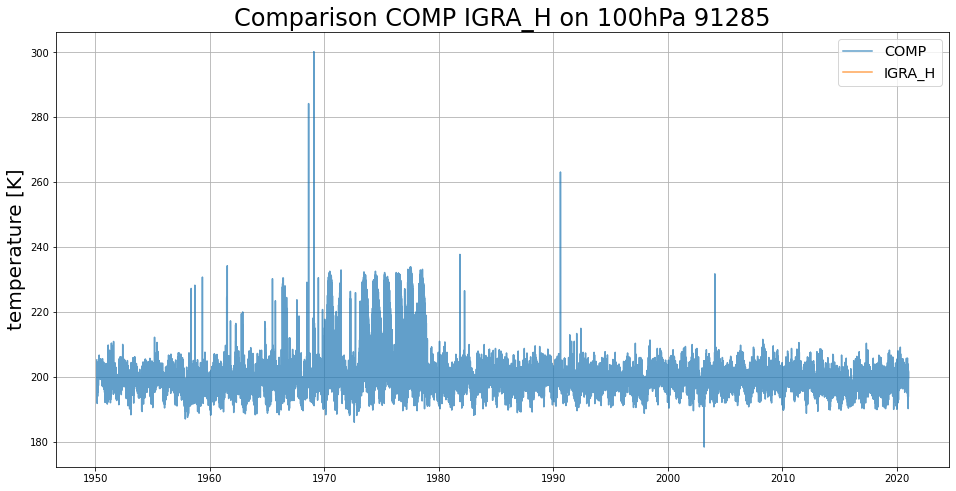

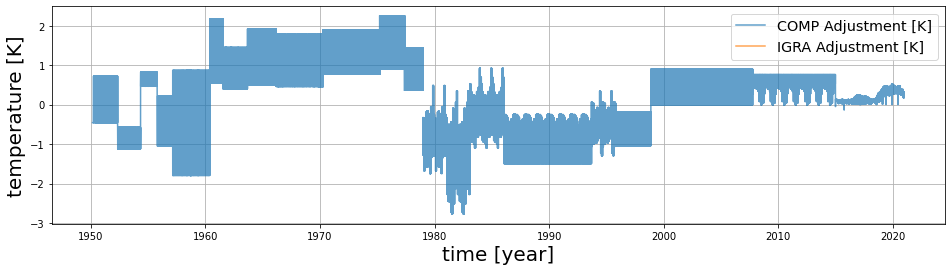

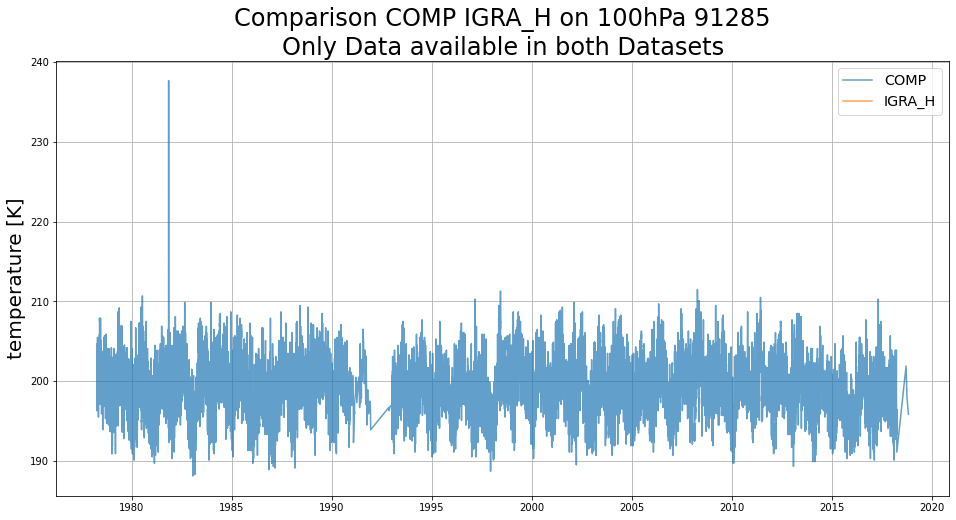

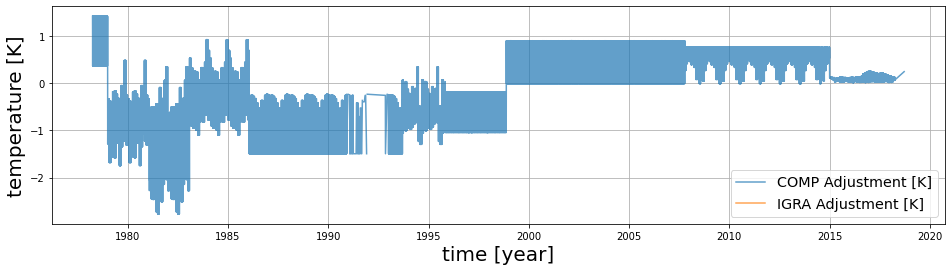

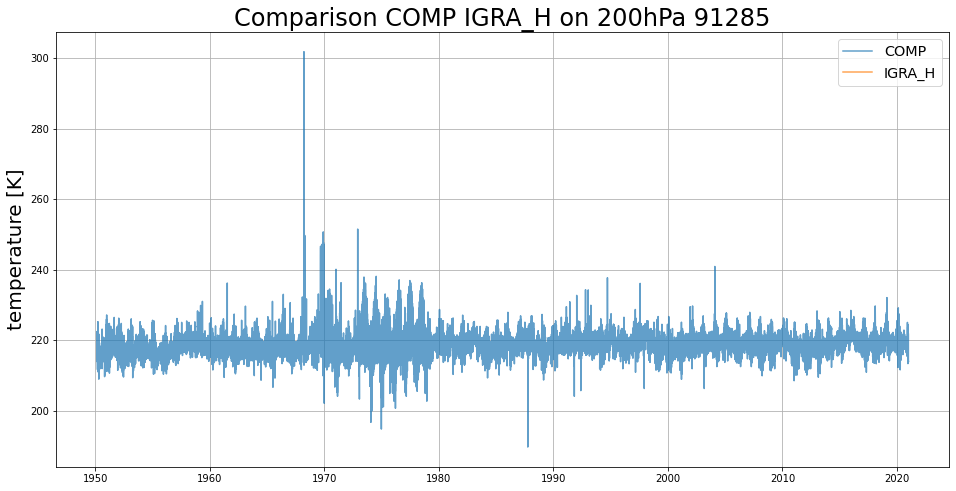

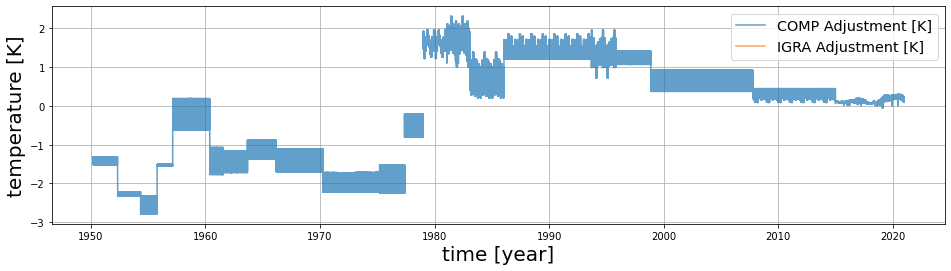

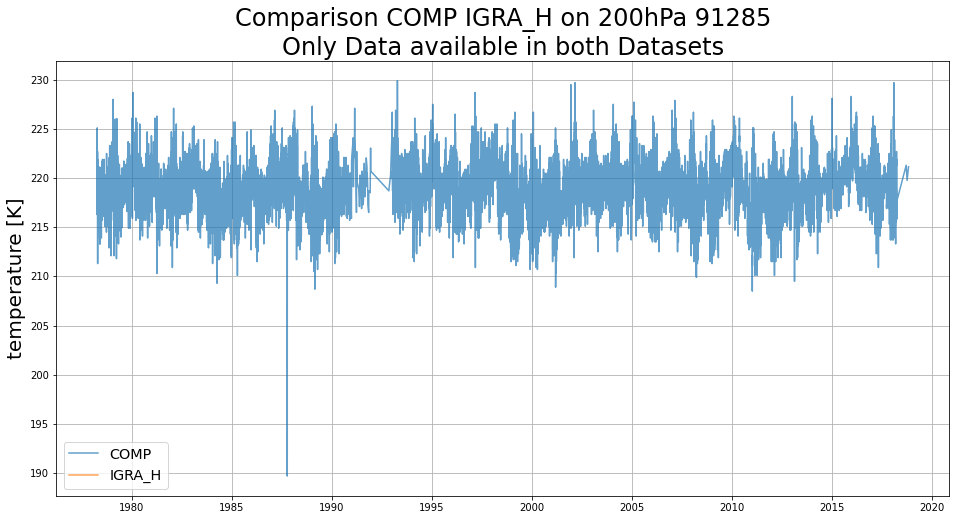

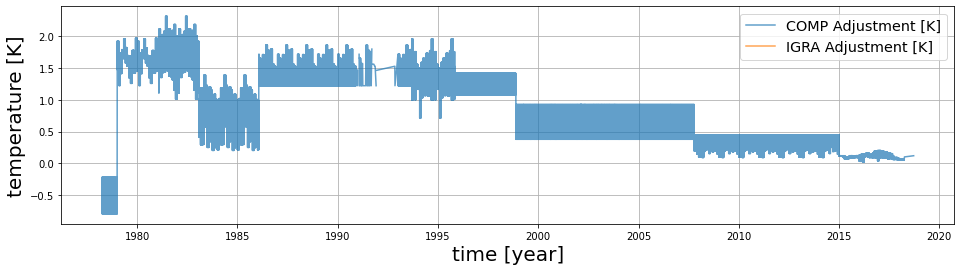

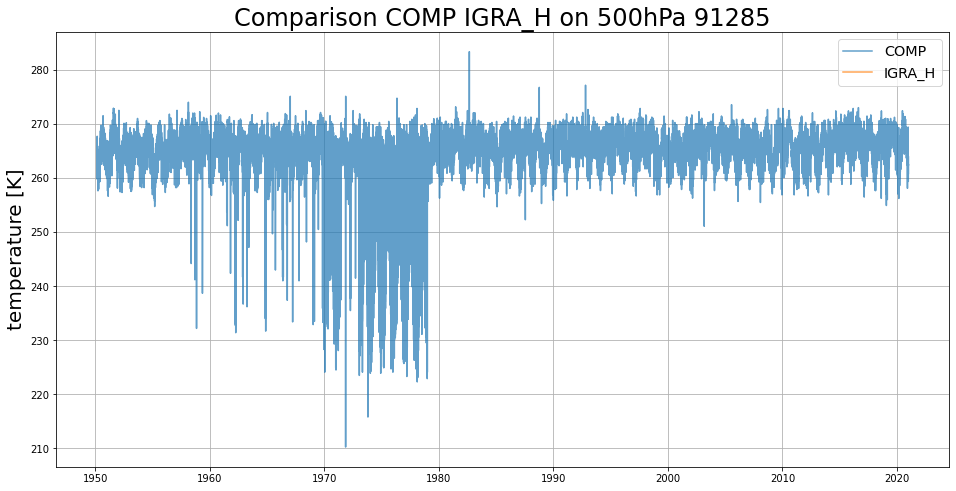

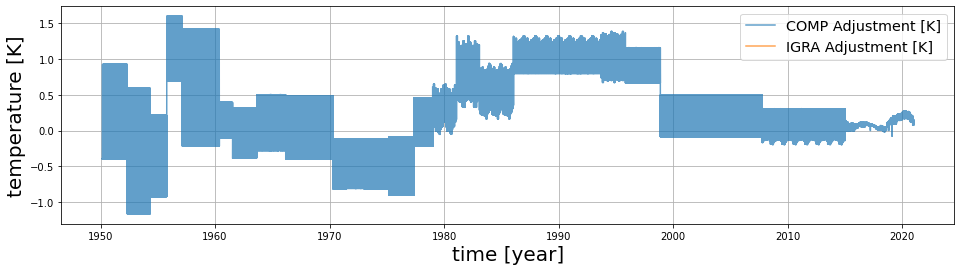

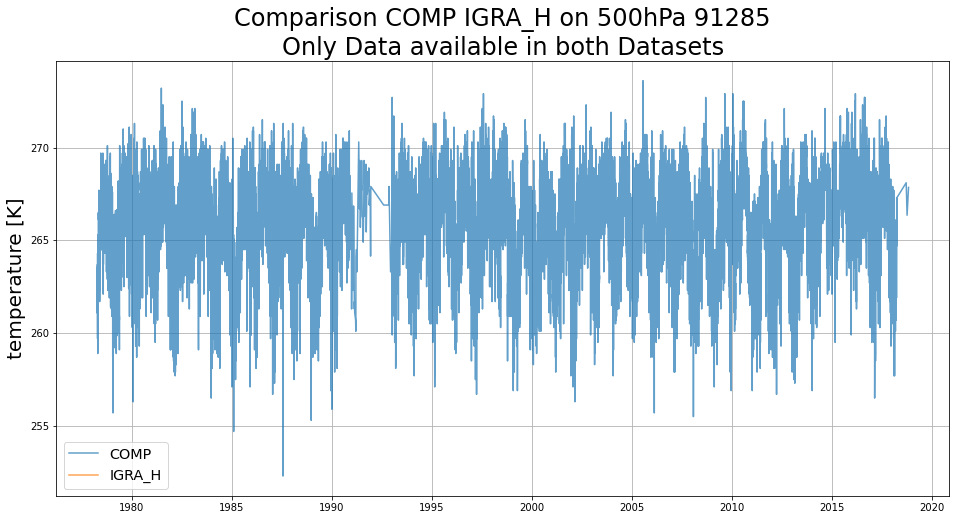

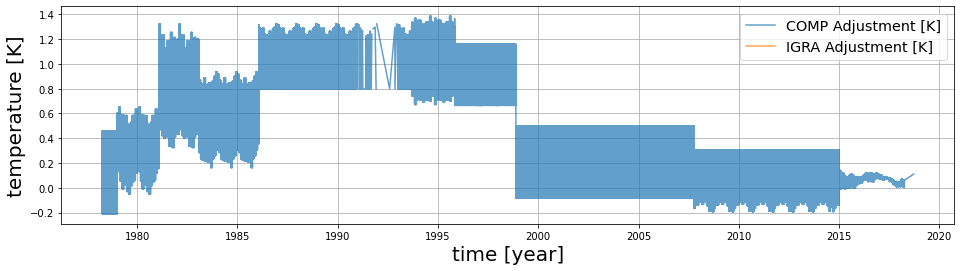

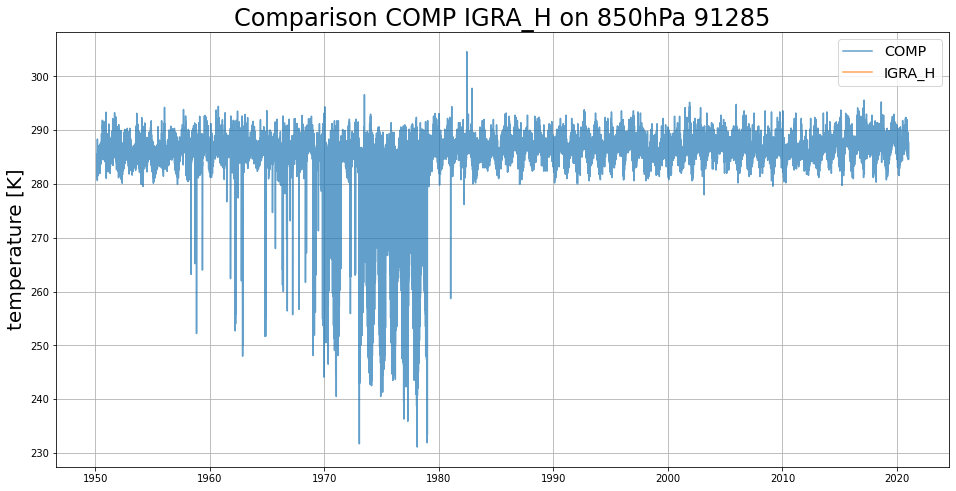

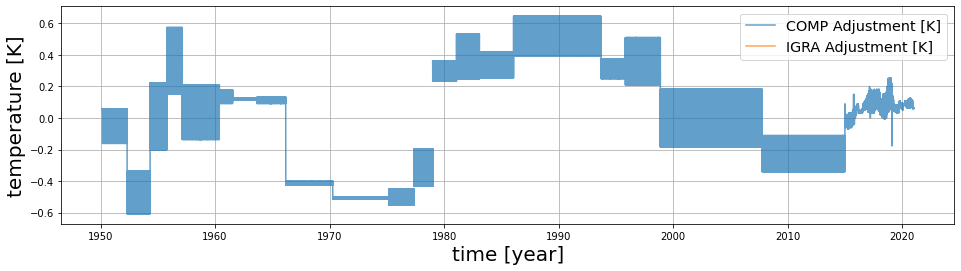

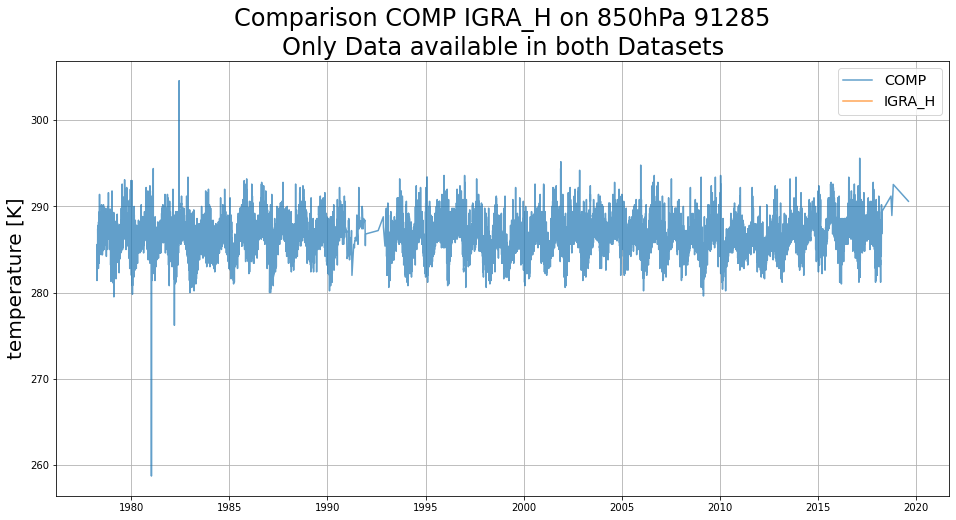

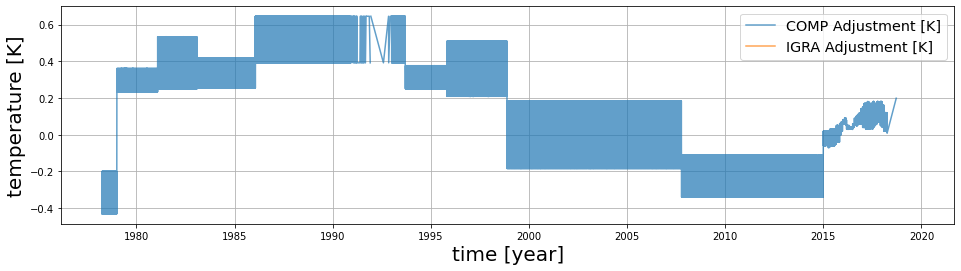

In [17]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_original[i]
    b = igrah_original[i]
    c = comp_original[i]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(c.time, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(b.report_timestamp, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc)
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(c.time, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(b.report_timestamp, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    a = igra_adjusted[i]
    b = igra_h_adjusted[i]
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(xax, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

## Trends:

Before we adjust the data sets any further, we have a look at the trends. <br>


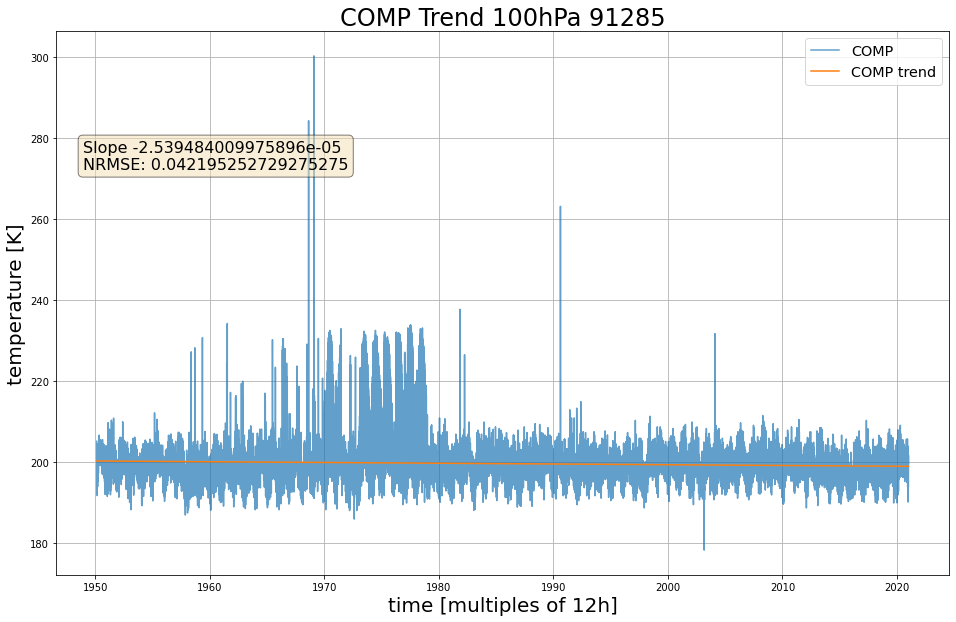

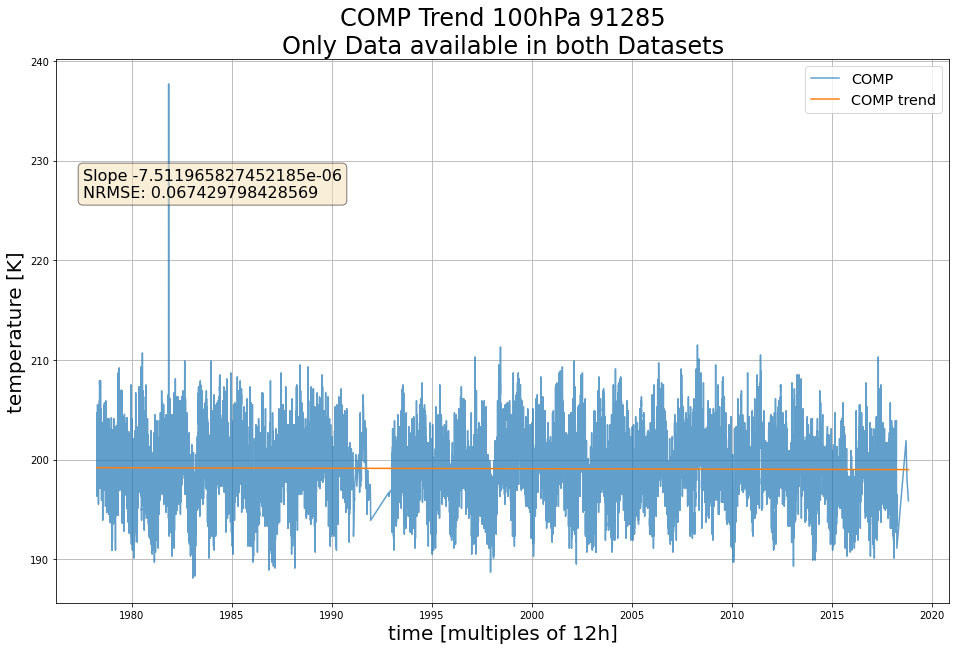

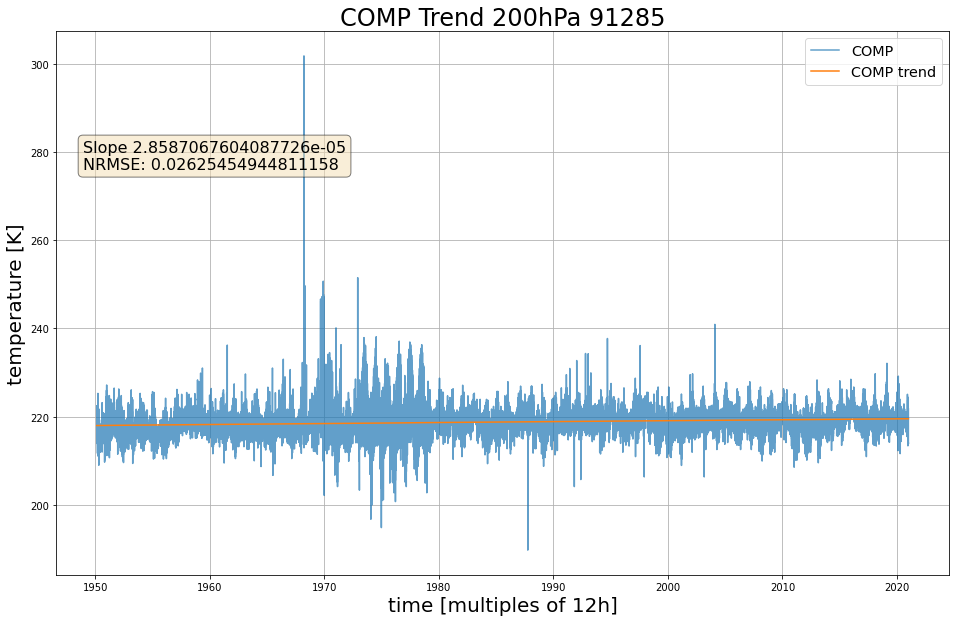

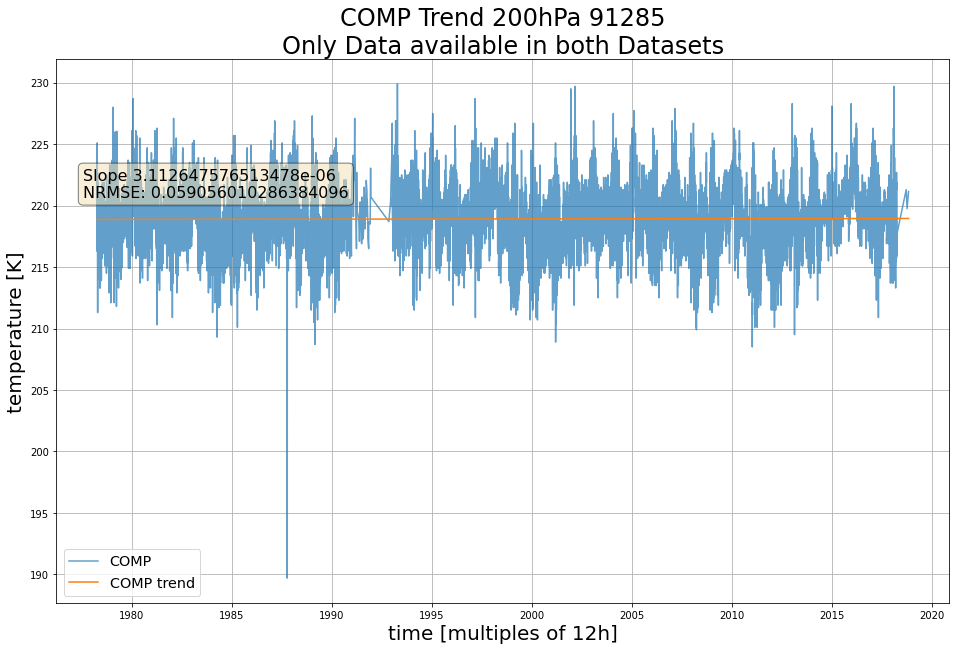

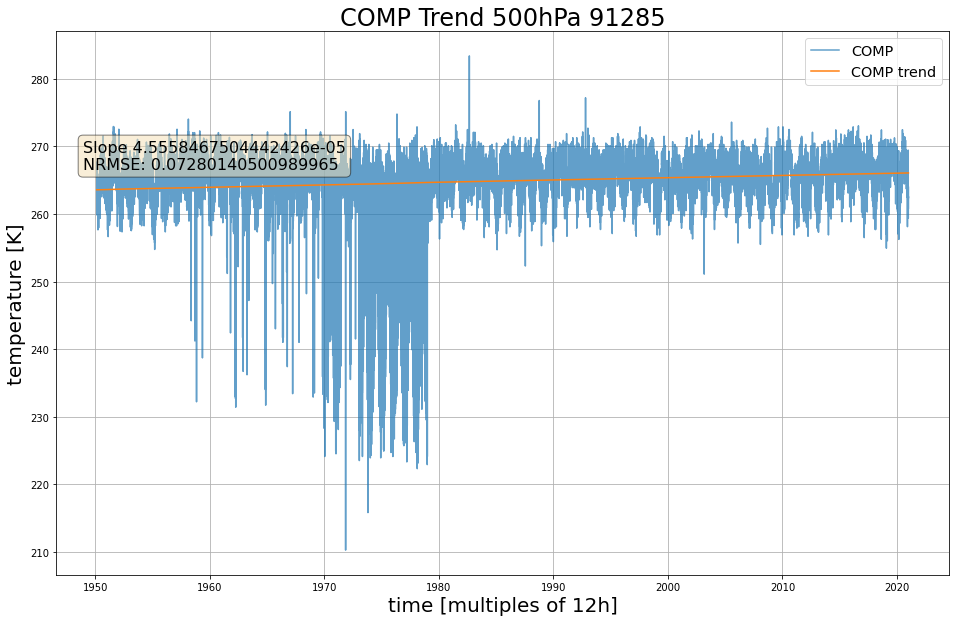

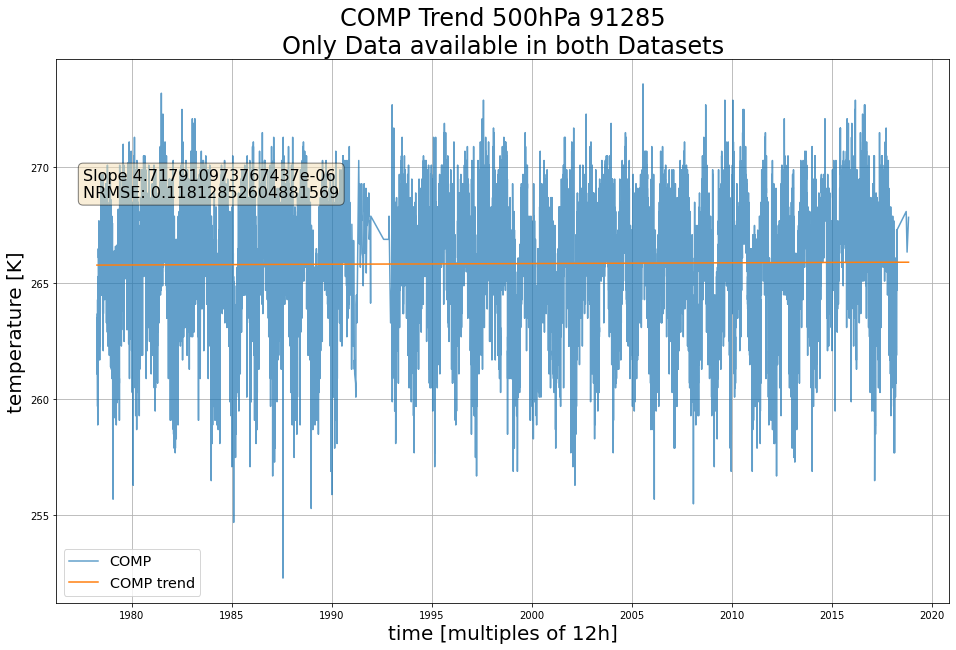

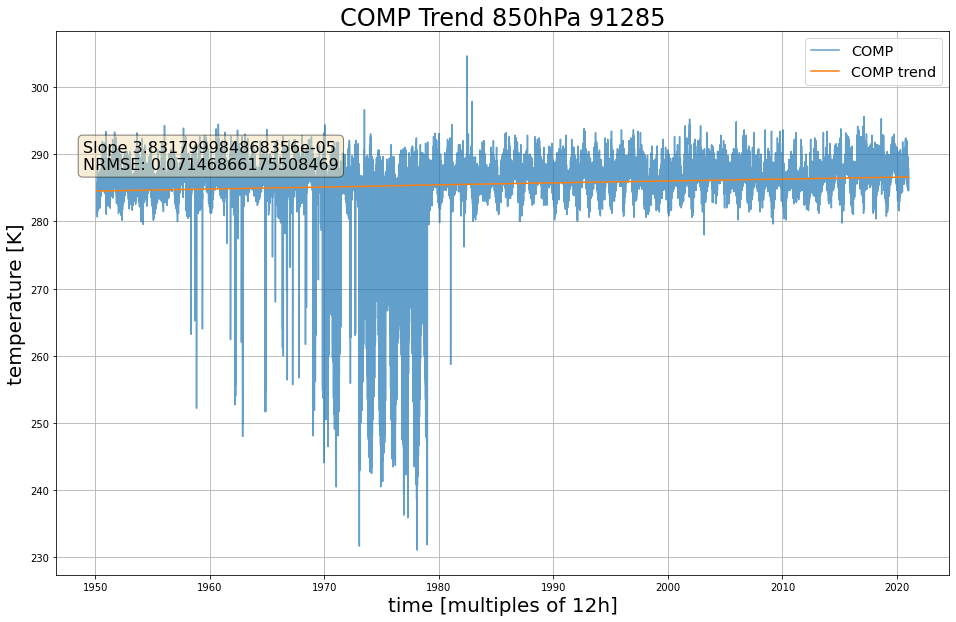

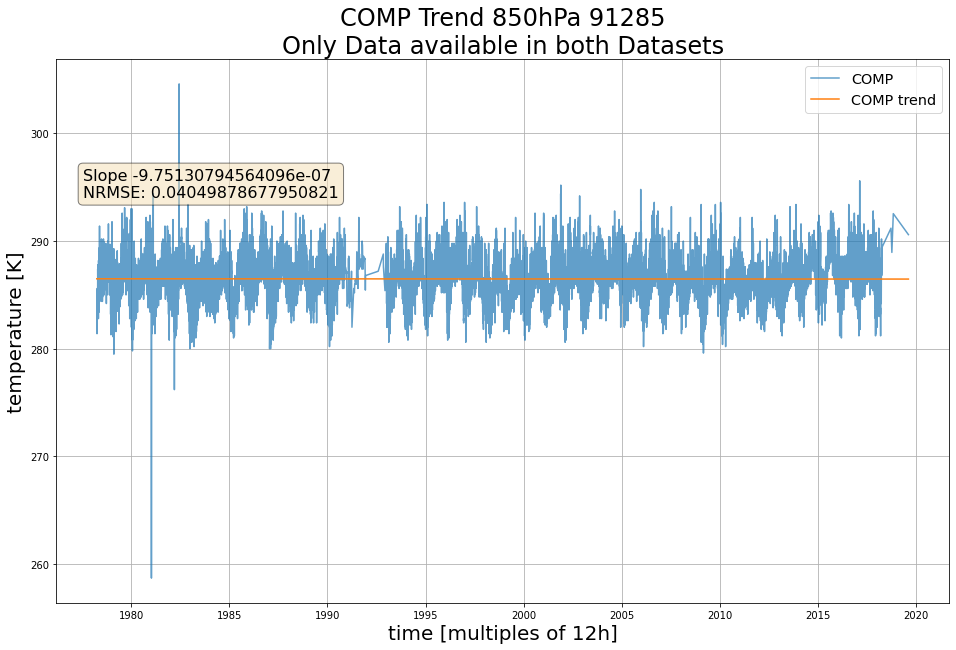

In [18]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = comp_original[i]
    xax = np.asarray(c.time)
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    

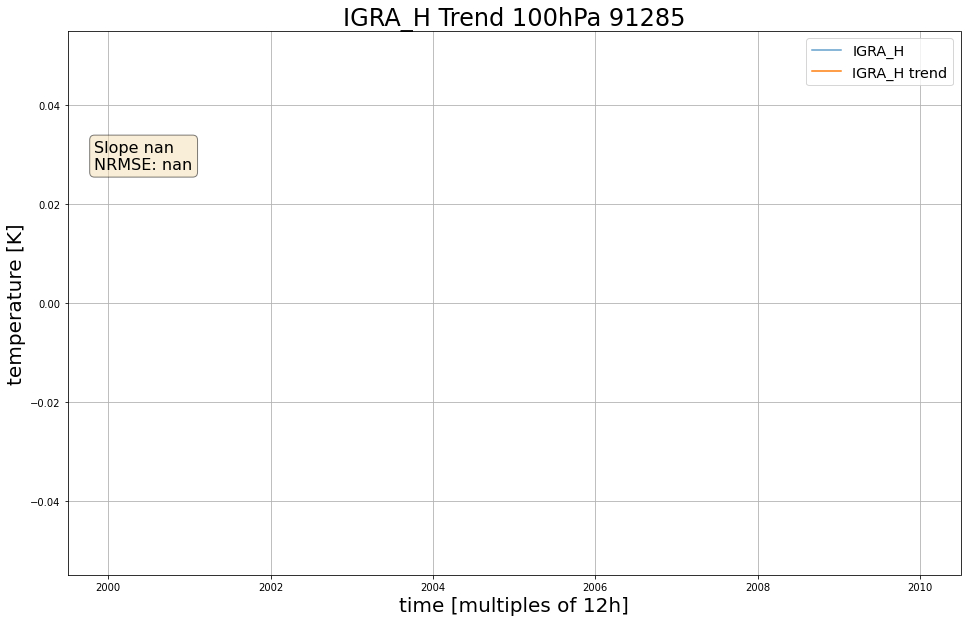

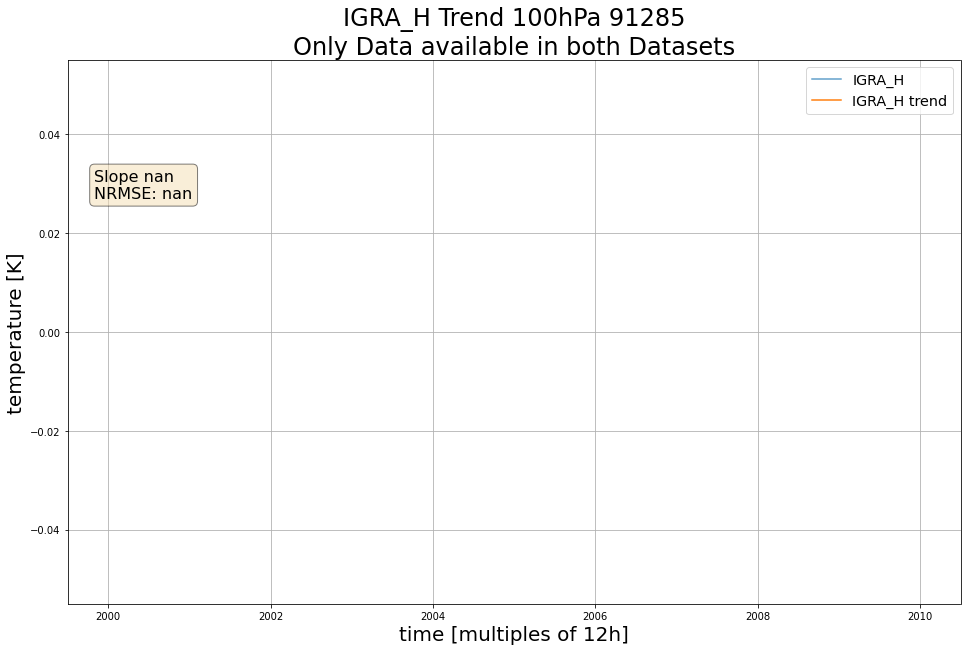

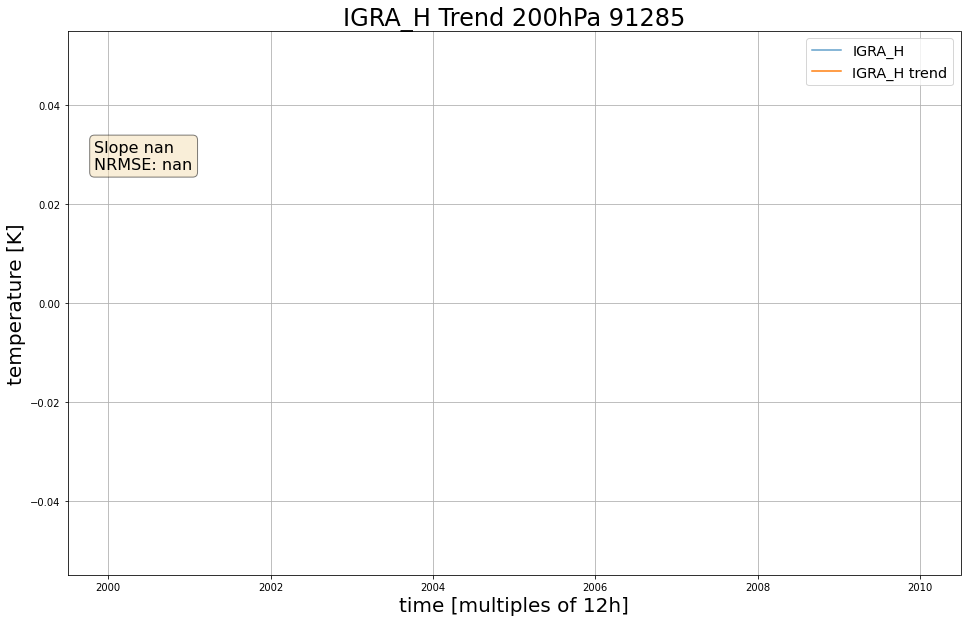

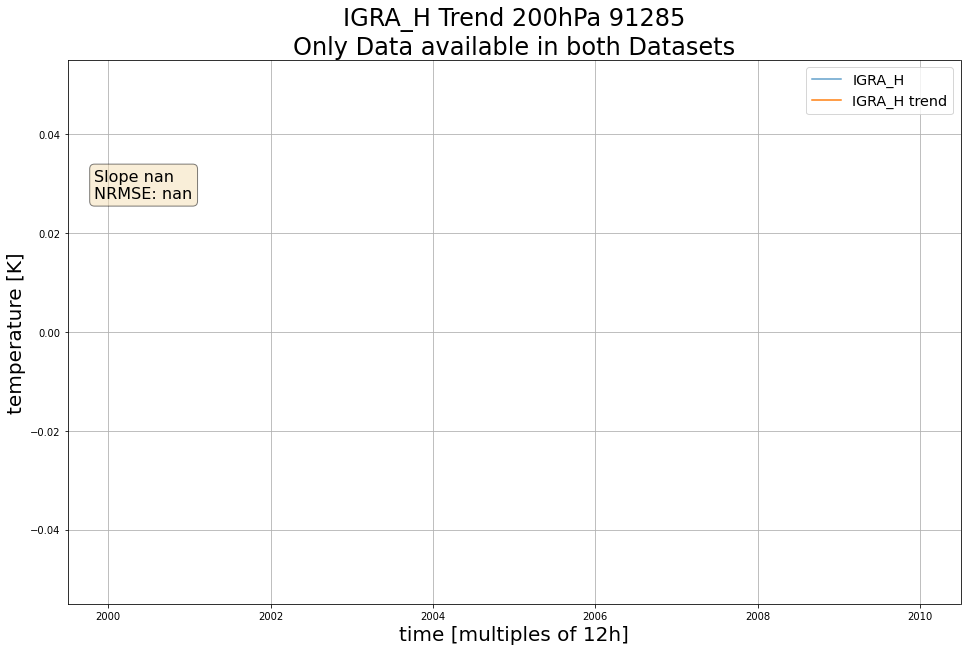

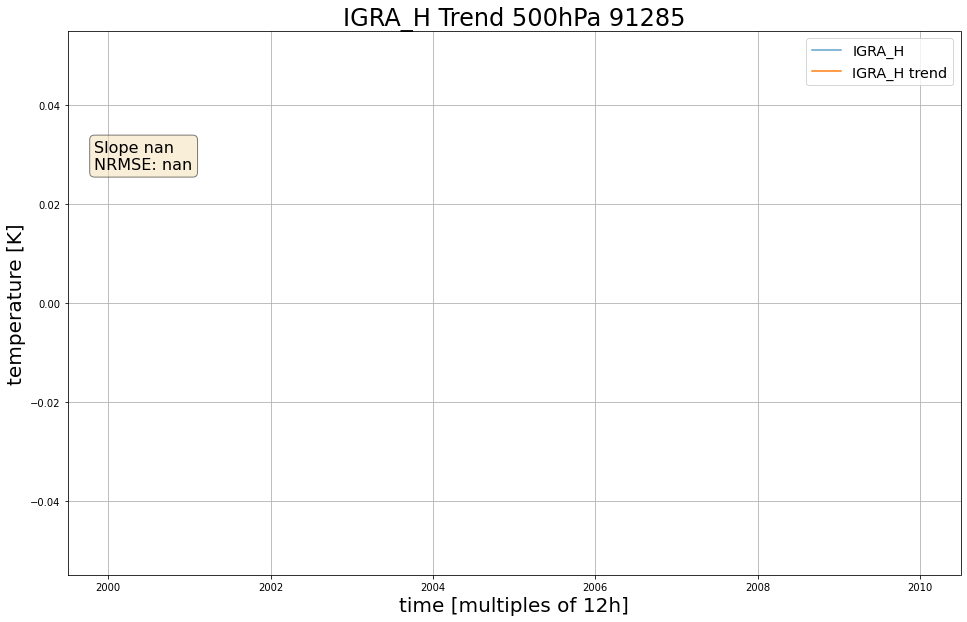

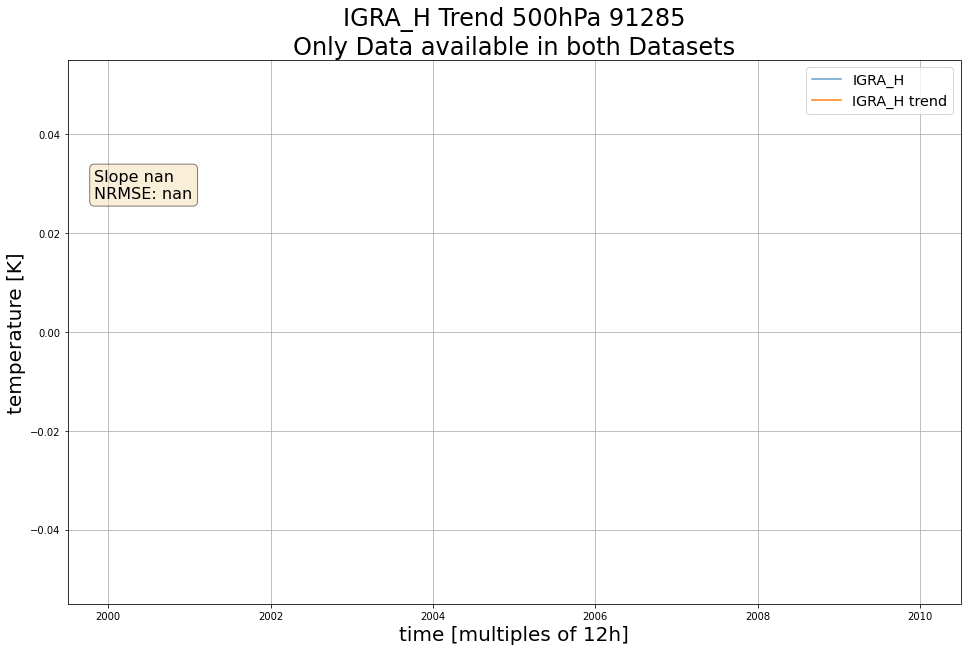

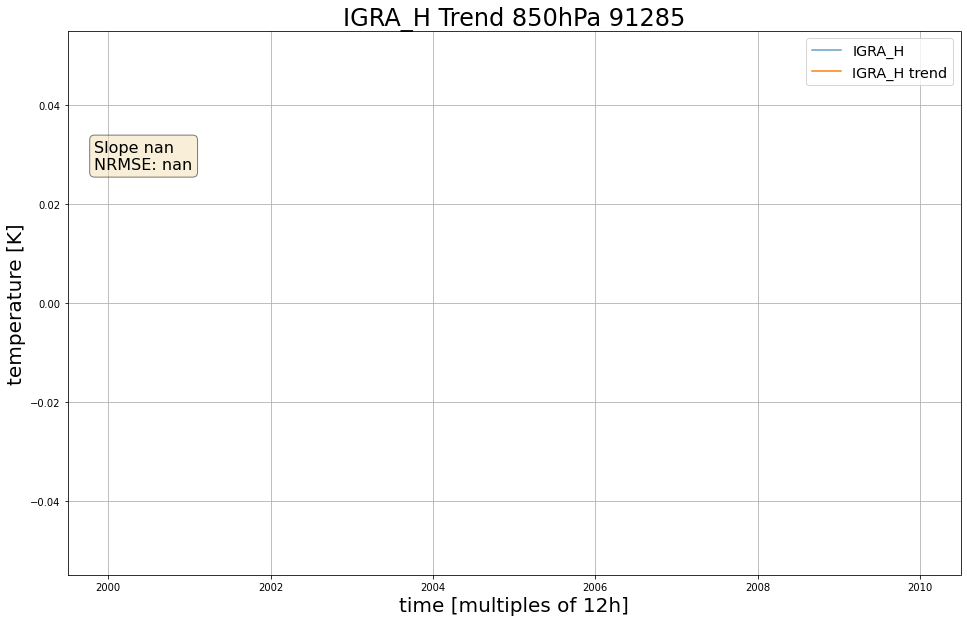

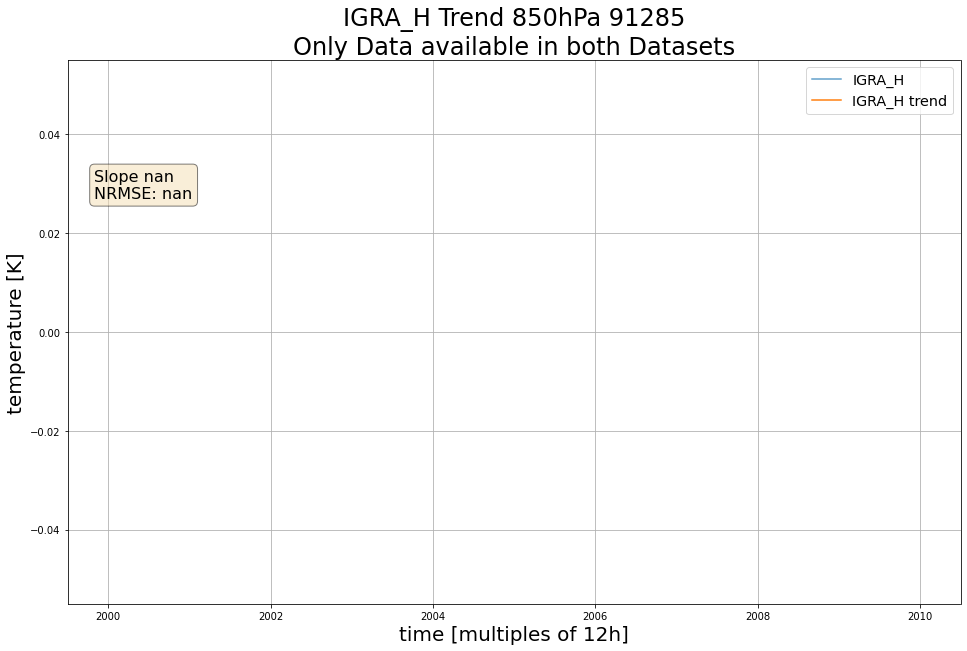

In [19]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = igrah_original[i]
    xax = np.asarray(c.report_timestamp)
    selected = c.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    
    c = igra_h_adjusted[i]
    xax = np.asarray(c.report_timestamp)
    selected = c.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    

## Moving Average

We remove the monthly variation, by creating a moving average over 14 days and subtracting it from the original data. <br>
Every data set is treated the same way, so they stay comparable.

In [20]:
# reduced data
#
comp_ma = []
igra_h_ma = []
igra_ma = []

for i in range(len(comp_adjusted)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_adjusted[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_ma.append(comp_adjusted[i])
    comp_ma[i].ta = comp_ma[i].ta - rm
    
    datain = np.asarray(igra_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_ma.append(igra_adjusted[i])
    igra_ma[i].air_temperature = igra_ma[i].air_temperature - rm
    
    datain = np.asarray(igra_h_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_h_ma.append(igra_h_adjusted[i])
    igra_h_ma[i].air_temperature = igra_h_ma[i].air_temperature - rm

In [21]:
# original data
#
comp_o_ma = []
igrah_o_ma = []
igra_o_ma = []

for i in range(len(comp_original)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_original[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_o_ma.append(comp_original[i])
    comp_o_ma[i].ta = comp_o_ma[i].ta - rm

    
for i in range(len(igra_original)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(igra_original[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_o_ma.append(igra_original[i])
    igra_o_ma[i].air_temperature = igra_o_ma[i].air_temperature - rm
    
    datain = np.asarray(igrah_original[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igrah_o_ma.append(igrah_original[i])
    igrah_o_ma[i].air_temperature = igrah_o_ma[i].air_temperature - rm

## Day and Night Data:

We split the data sets into a day ascent and night ascent part. <br>

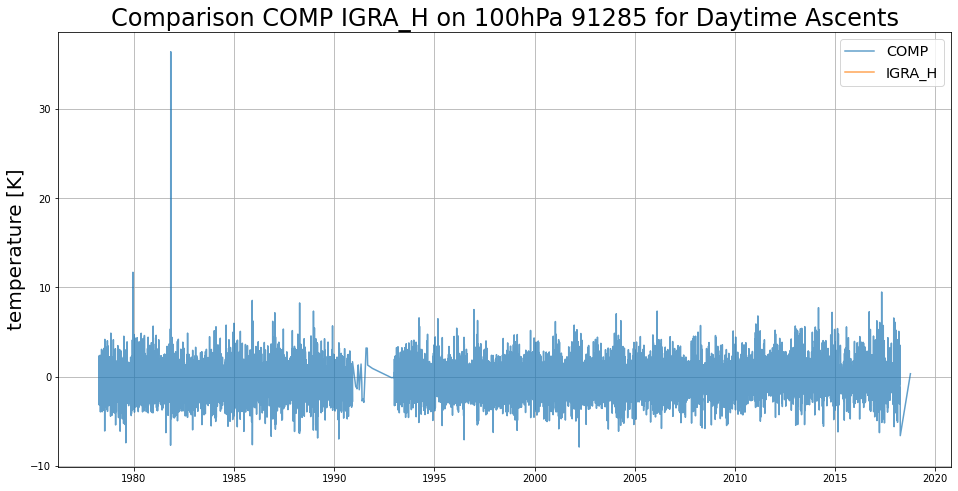

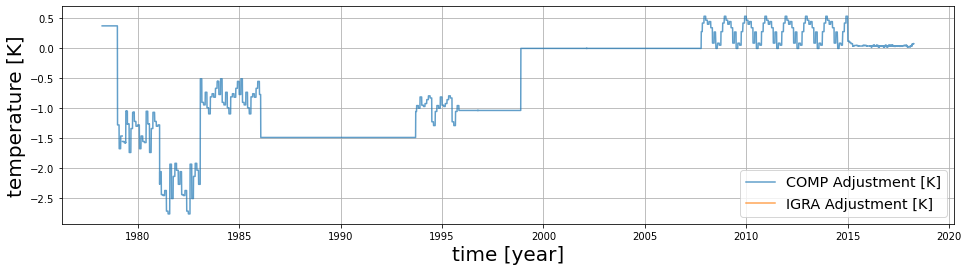

COMP Adjustment MEAN: -0.5956398
COMP Adjustment MIN: -2.7700648
COMP Adjustment MAX: 0.526769
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


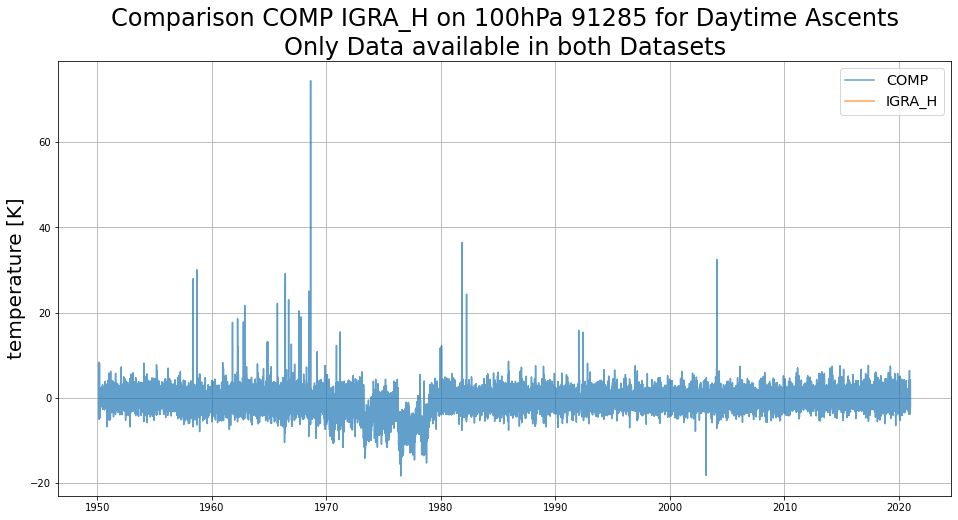

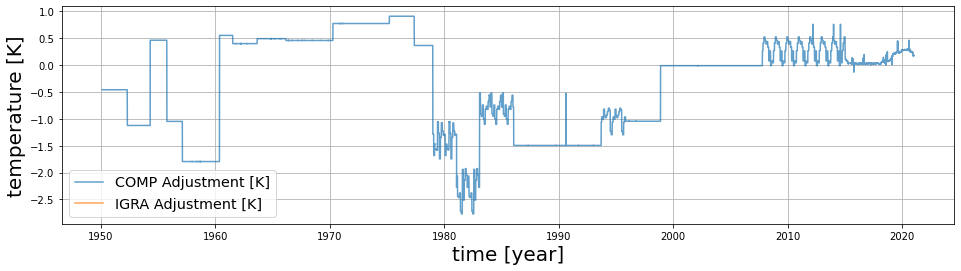

COMP Adjustment MEAN: -0.3162636
COMP Adjustment MIN: -2.7700648
COMP Adjustment MAX: 0.91061723
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


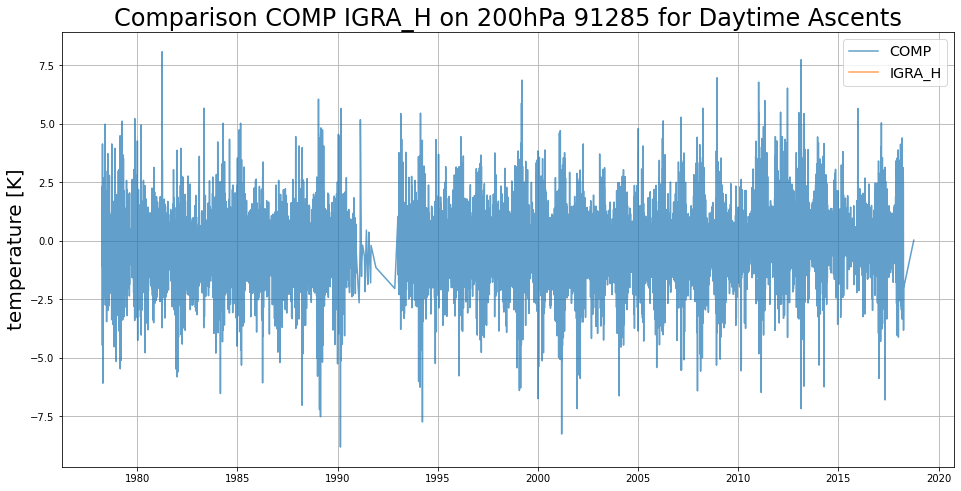

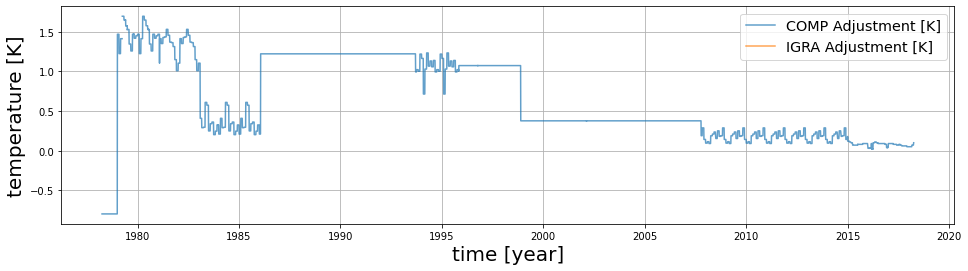

COMP Adjustment MEAN: 0.6405752
COMP Adjustment MIN: -0.79775995
COMP Adjustment MAX: 1.6959252
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


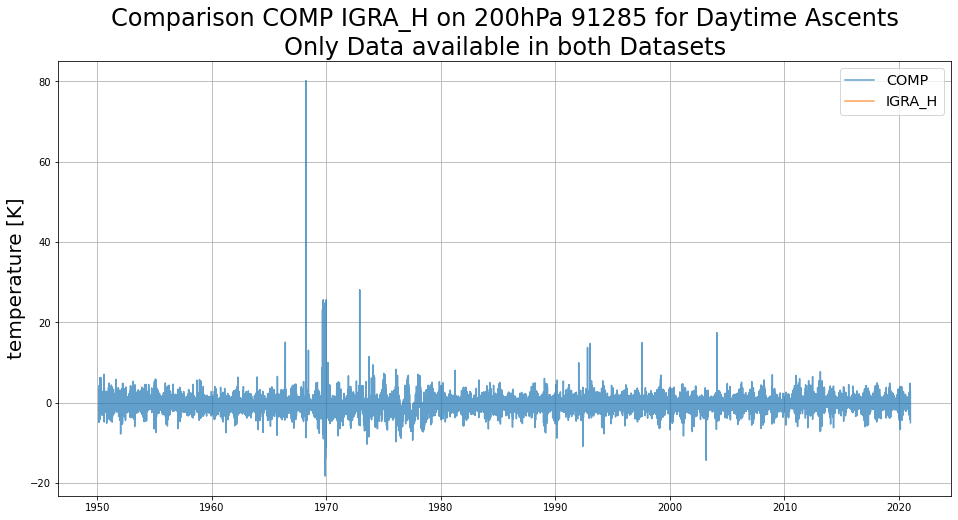

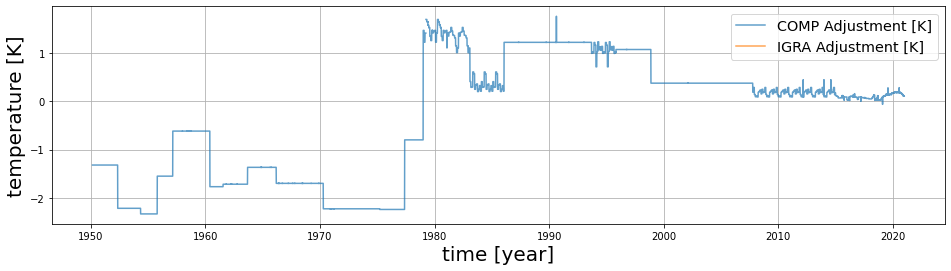

COMP Adjustment MEAN: -0.3180054
COMP Adjustment MIN: -2.330745
COMP Adjustment MAX: 1.762048
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


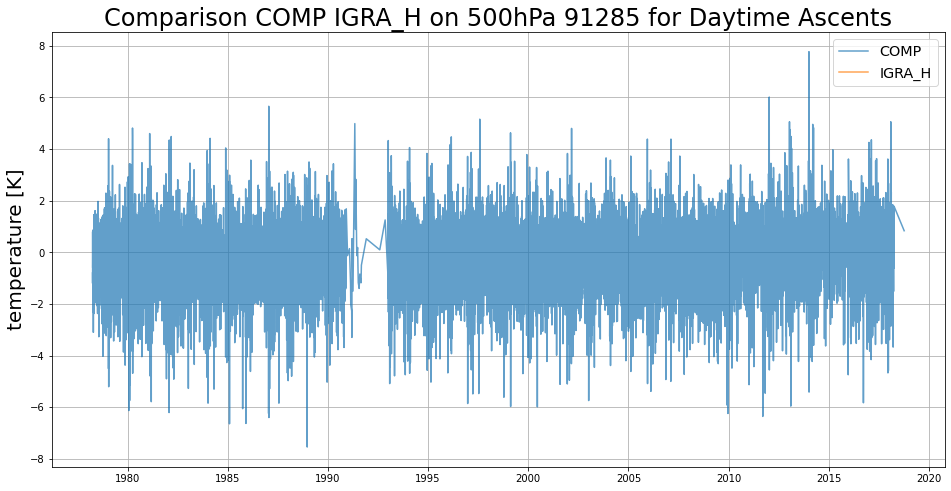

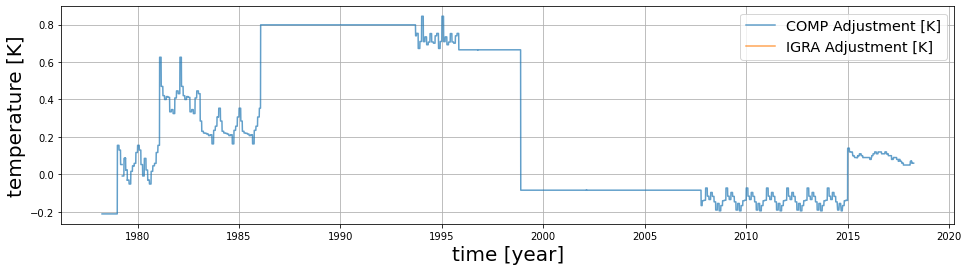

COMP Adjustment MEAN: 0.22171609
COMP Adjustment MIN: -0.21098173
COMP Adjustment MAX: 0.84431434
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


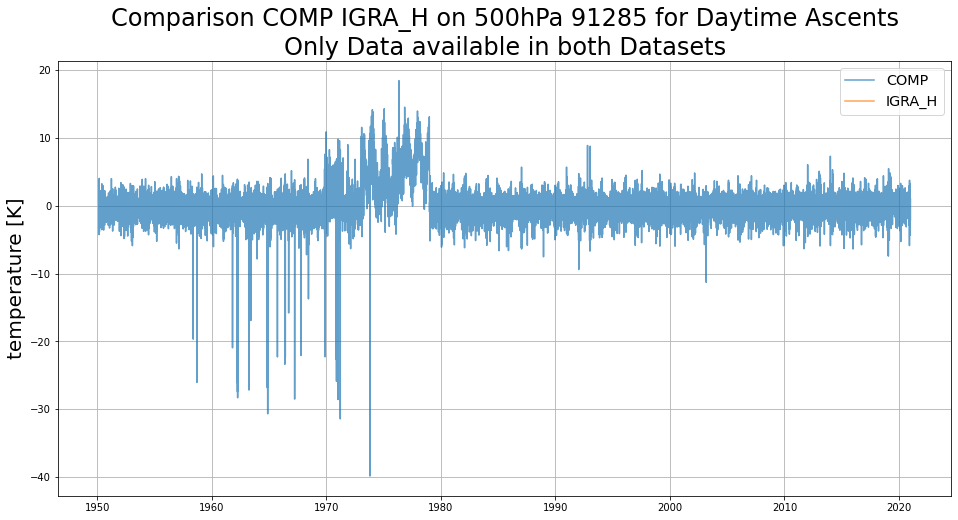

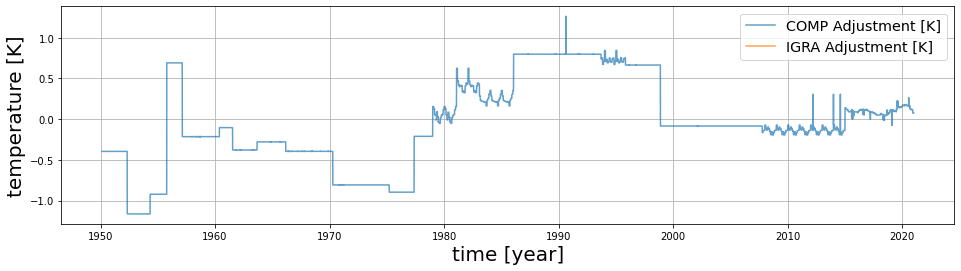

COMP Adjustment MEAN: -0.05650503
COMP Adjustment MIN: -1.1639012
COMP Adjustment MAX: 1.2644811
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


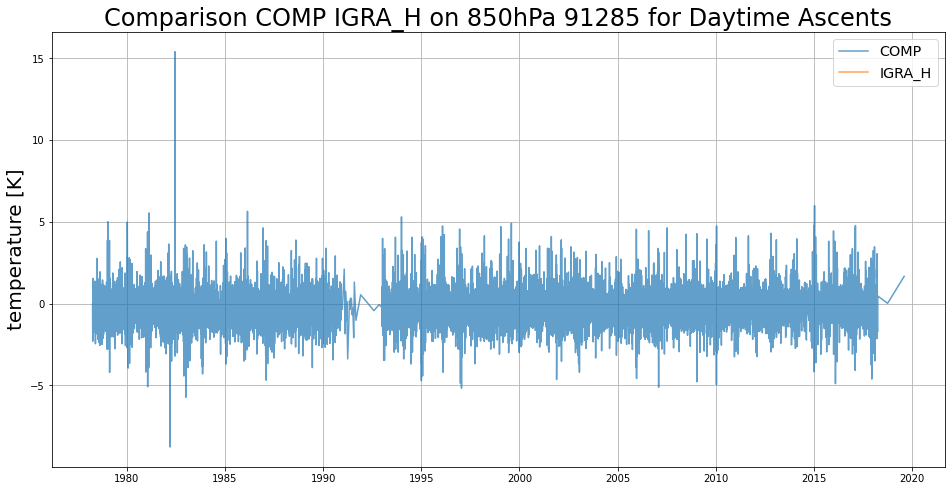

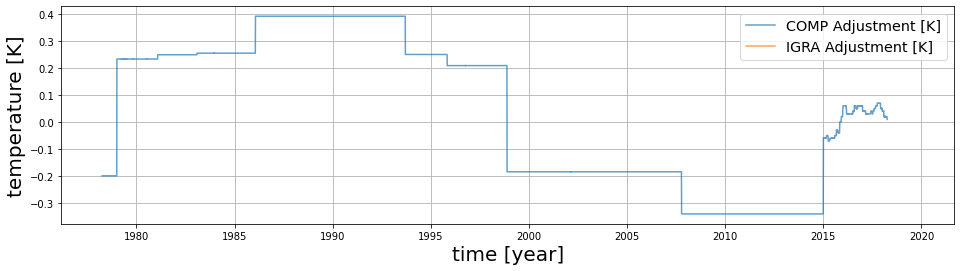

COMP Adjustment MEAN: 0.02913834
COMP Adjustment MIN: -0.340075
COMP Adjustment MAX: 0.39172196
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


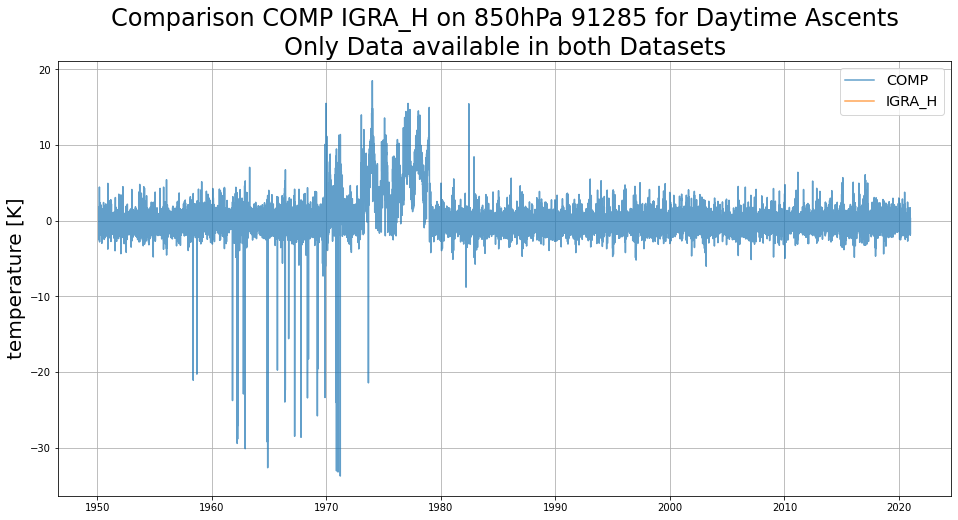

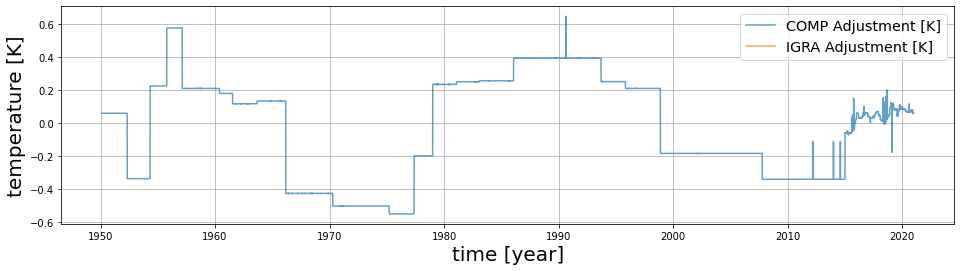

COMP Adjustment MEAN: -0.019804241
COMP Adjustment MIN: -0.5500831
COMP Adjustment MAX: 0.64560586
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


In [22]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))
    
    
    a = igra_o_ma[i]
    a = a[a.report_timestamp.dt.hour >= 6]
    a = a[a.report_timestamp.dt.hour < 18]
    b = igrah_o_ma[i]
    b = b[b.report_timestamp.dt.hour >= 6]
    b = b[b.report_timestamp.dt.hour < 18]
    c = comp_o_ma[i]
    c = c[c.time.dt.hour >= 6]
    c = c[c.time.dt.hour < 18]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))

In [23]:
a = igra_o_ma[0]
a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour > 18])

station_name    report_timestamp  report_id   longitude  latitude  \
19       USM00091285 1978-04-01 00:00:00   32244206 -155.058304   19.7183   
133      USM00091285 1978-04-02 00:00:00   32244232 -155.058304   19.7183   
243      USM00091285 1978-04-03 00:00:00   32244256 -155.058304   19.7183   
305      USM00091285 1978-04-04 00:00:00   32244280 -155.058304   19.7183   
395      USM00091285 1978-04-05 00:00:00   32244300 -155.058304   19.7183   
...              ...                 ...        ...         ...       ...   
482719   USM00091285 1992-12-05 23:00:00   32220836 -155.058304   19.7183   
482984   USM00091285 1992-12-07 23:00:00   32220896 -155.058304   19.7183   
483097   USM00091285 1992-12-08 23:00:00   32220930 -155.058304   19.7183   
3353713  USM00091285 2016-04-17 23:00:00   32259621 -155.058304   19.7183   
3843306  USM00091285 2019-09-27 23:00:00   32260672 -155.058304   19.7183   

         air_pressure  air_temperature             actual_time  \
19            10000.0        -0.400002  1978-04-01 00:00:00+00   
133           10000.0         0.700005  1978-04-02 00:00:00+00   
243           10000.0         2.299995  1978-04-03 00:00:00+00   
305           10000.0         0.299995  1978-04-04 00:00:00+00   
395           10000.0        -2.199996  1978-04-05 00:00:00+00   
...               ...              ...                     ...   
482719        10000.0        -1.385716  1992-12-05 23:00:00+00   
482984        10000.0         0.714291  1992-12-07 23:00:00+00   
483097        10000.0        -1.814280  1992-12-08 23:00:00+00   
3353713       10000.0         0.392863  2016-04-17 22:34:00+00   
3843306       10000.0        -0.835717  2019-09-27 22:58:00+00   

         height_of_station_above_sea_level  
19                                    11.0  
133                                   11.0  
243                                   11.0  
305                                   11.0  
395                                   11.0  
...                                    ...  
482719                                11.0  
482984                                11.0  
483097                                11.0  
3353713                               11.0  
3843306                               11.0  

[14678 rows x 9 columns]

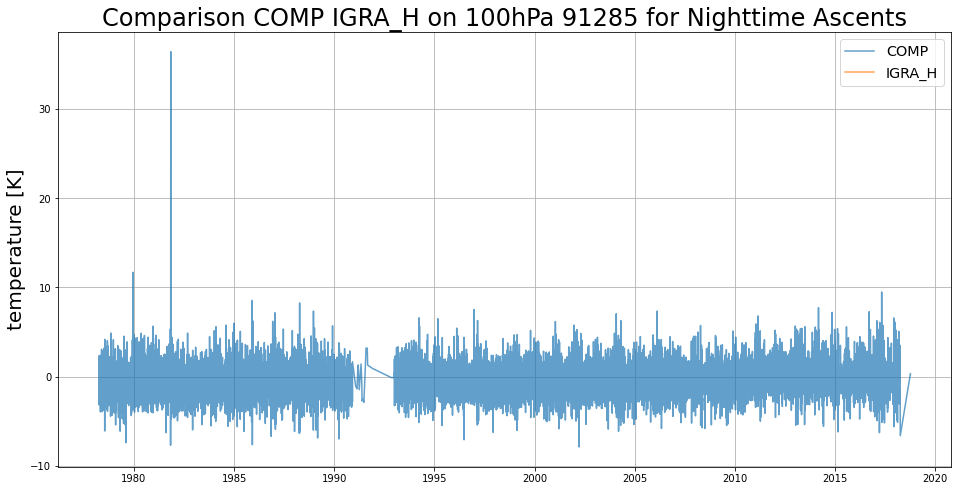

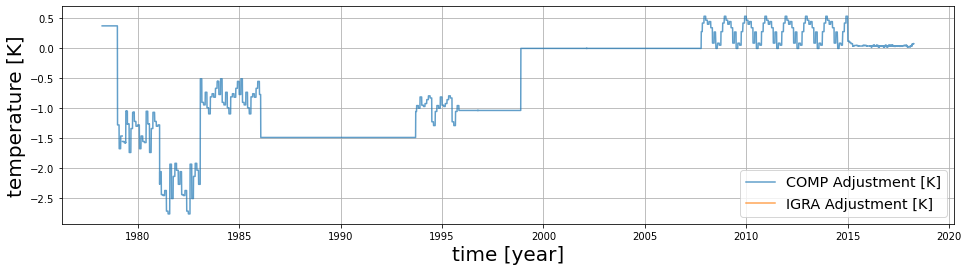

COMP Adjustment MEAN: -0.5956398
COMP Adjustment MIN: -2.7700648
COMP Adjustment MAX: 0.526769
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


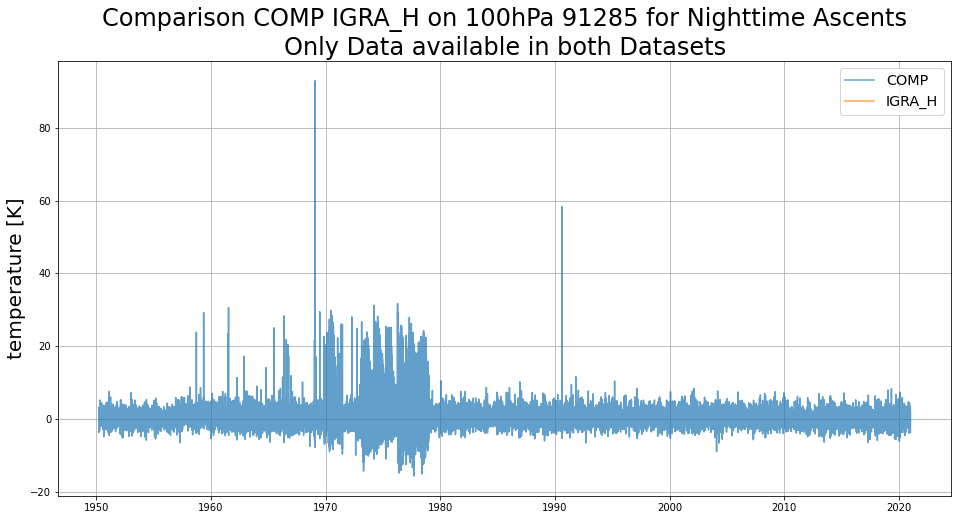

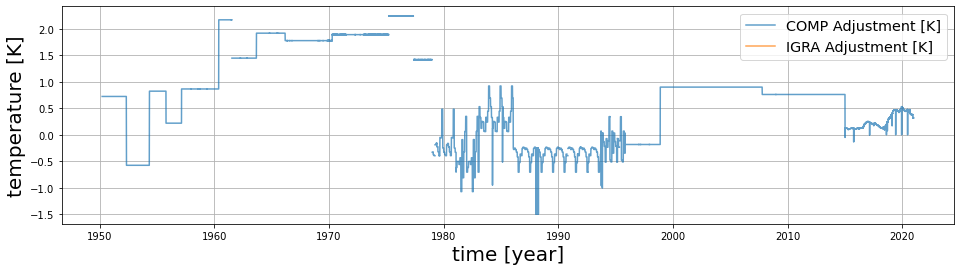

COMP Adjustment MEAN: 0.70403755
COMP Adjustment MIN: -1.4947683
COMP Adjustment MAX: 2.239654
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


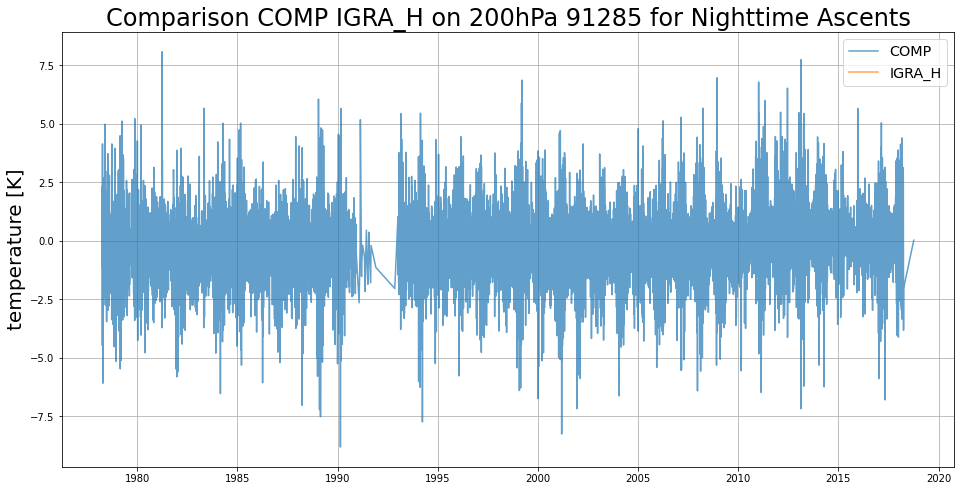

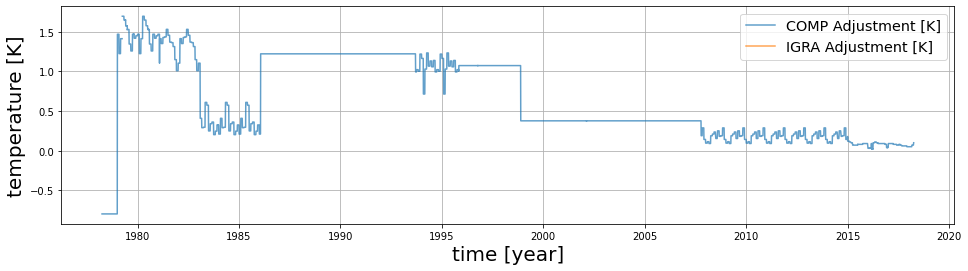

COMP Adjustment MEAN: 0.6405752
COMP Adjustment MIN: -0.79775995
COMP Adjustment MAX: 1.6959252
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


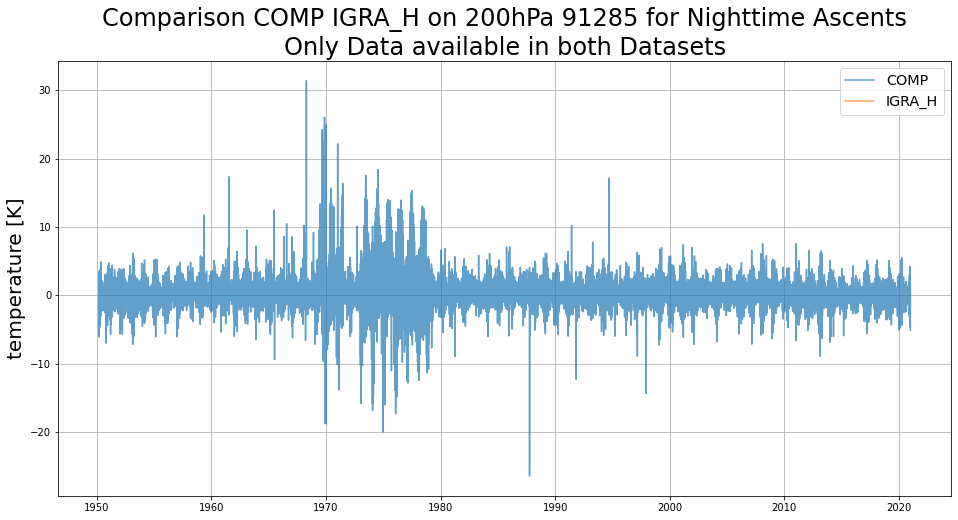

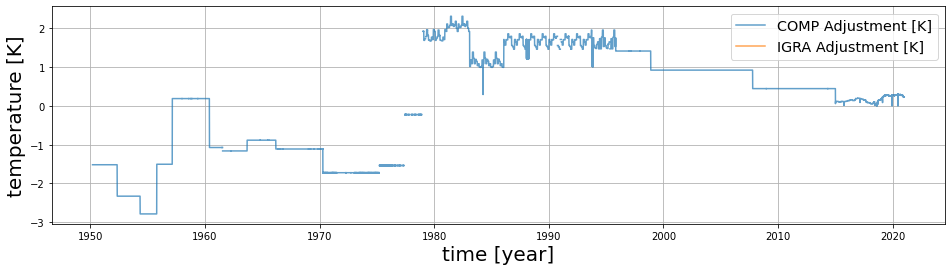

COMP Adjustment MEAN: 0.10015551
COMP Adjustment MIN: -2.785098
COMP Adjustment MAX: 2.3159194
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


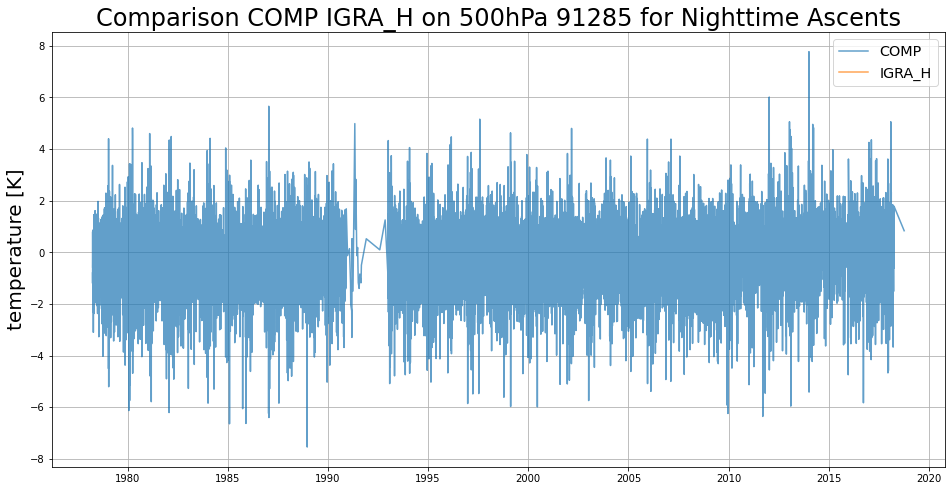

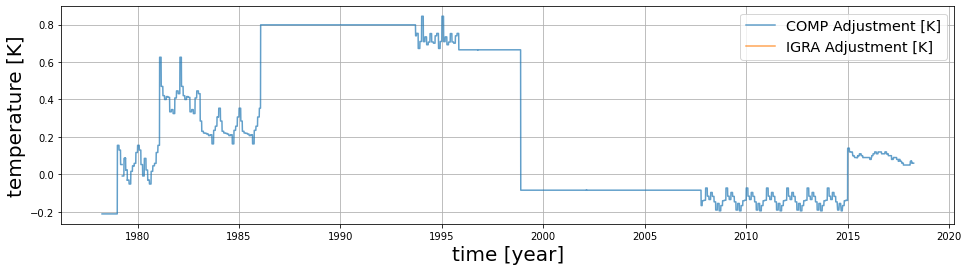

COMP Adjustment MEAN: 0.22171609
COMP Adjustment MIN: -0.21098173
COMP Adjustment MAX: 0.84431434
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


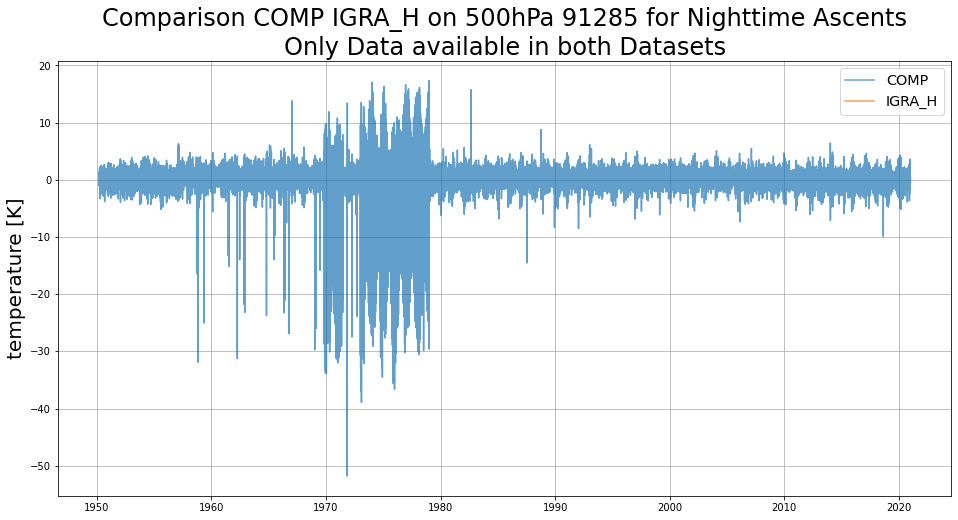

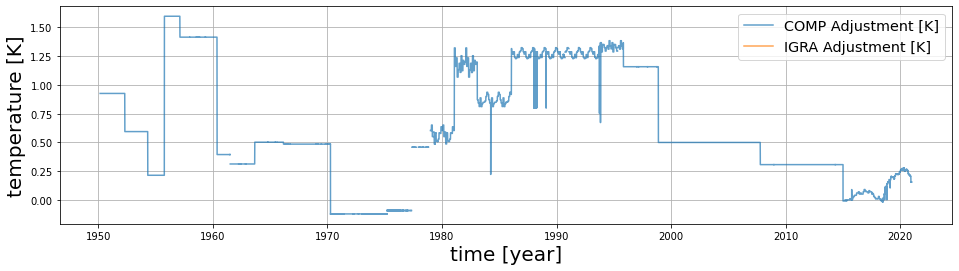

COMP Adjustment MEAN: 0.6252221
COMP Adjustment MIN: -0.122407824
COMP Adjustment MAX: 1.5978053
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


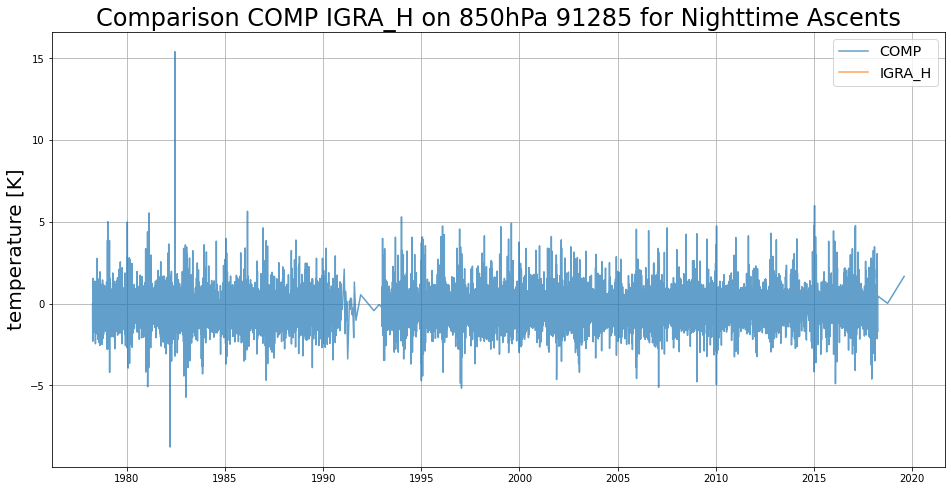

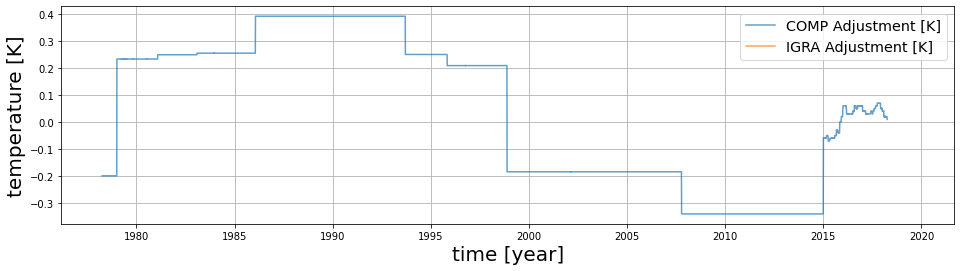

COMP Adjustment MEAN: 0.02913834
COMP Adjustment MIN: -0.340075
COMP Adjustment MAX: 0.39172196
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


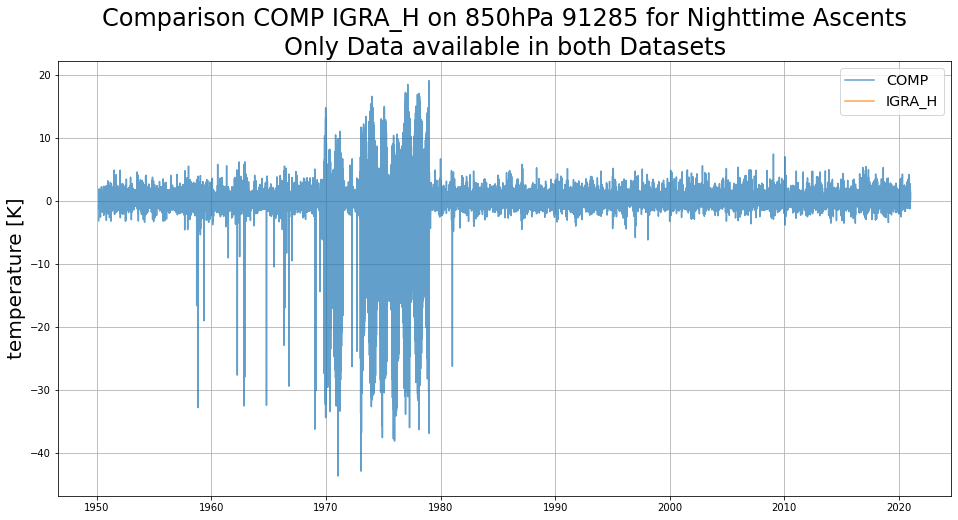

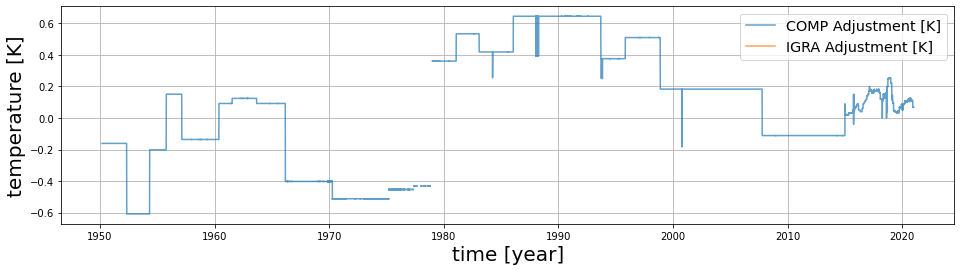

COMP Adjustment MEAN: 0.06408811
COMP Adjustment MIN: -0.60855424
COMP Adjustment MAX: 0.64560604
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


In [24]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))
    
    
    a = igra_o_ma[i]
    a = a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour >= 18]).sort_values('report_timestamp')
    b = igrah_o_ma[i]
    b = b[b.report_timestamp.dt.hour < 6].append(b[b.report_timestamp.dt.hour >= 18]).sort_values('report_timestamp')
    c = comp_o_ma[i]
    c = c[c.time.dt.hour < 6].append(c[c.time.dt.hour >= 18]).sort_values('time')
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))

## Difference:

Finding the difference between the two data sets by subtracting them.

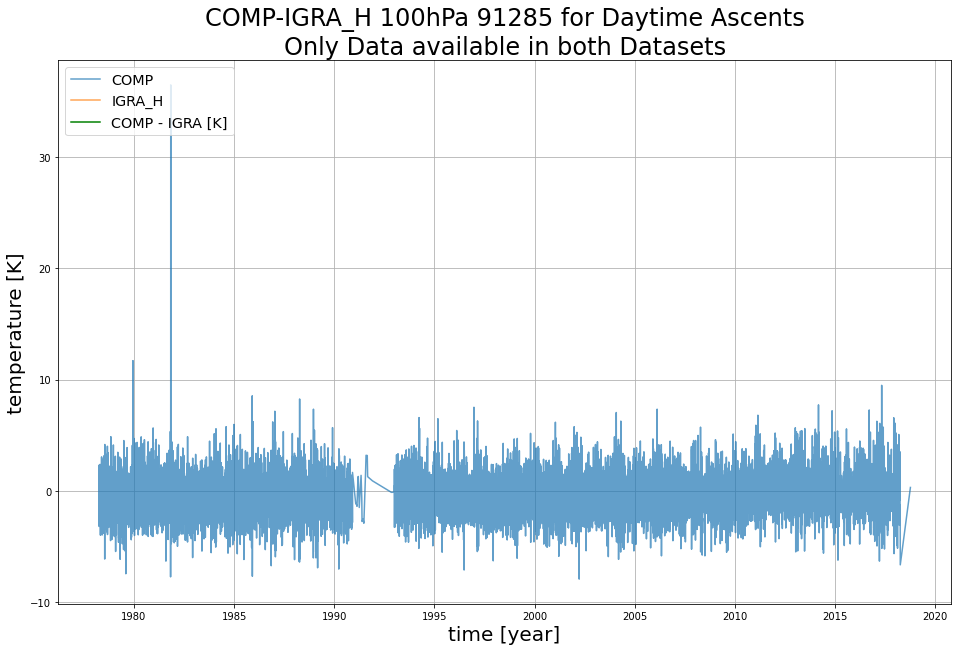

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


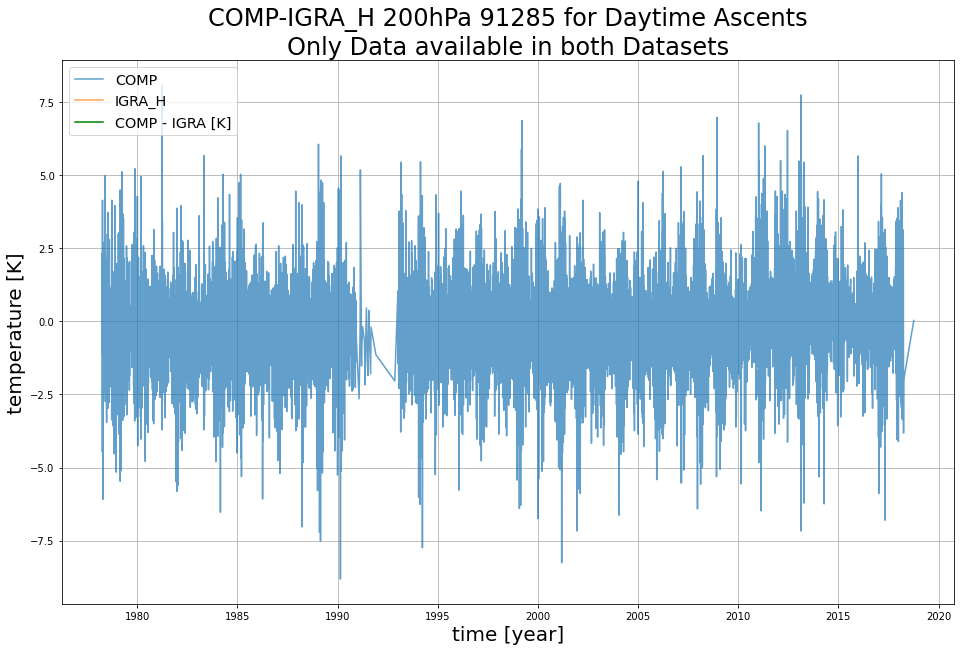

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


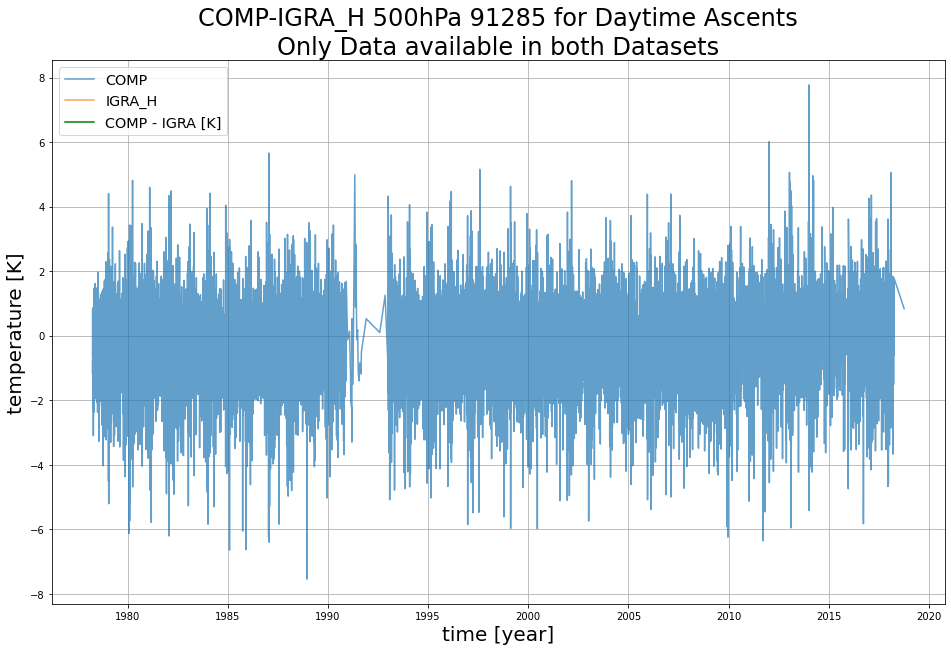

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


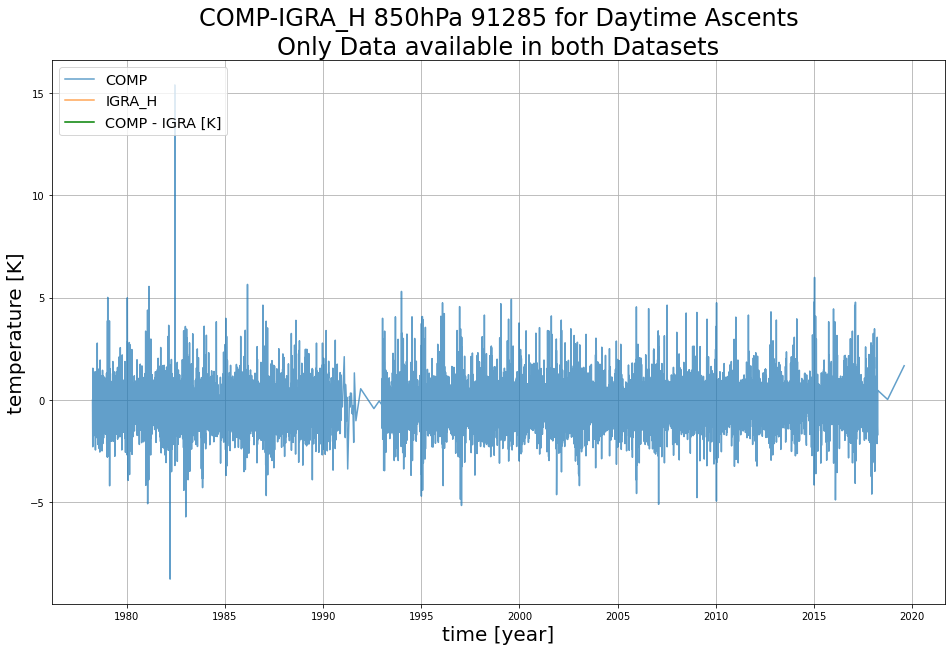

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


In [25]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

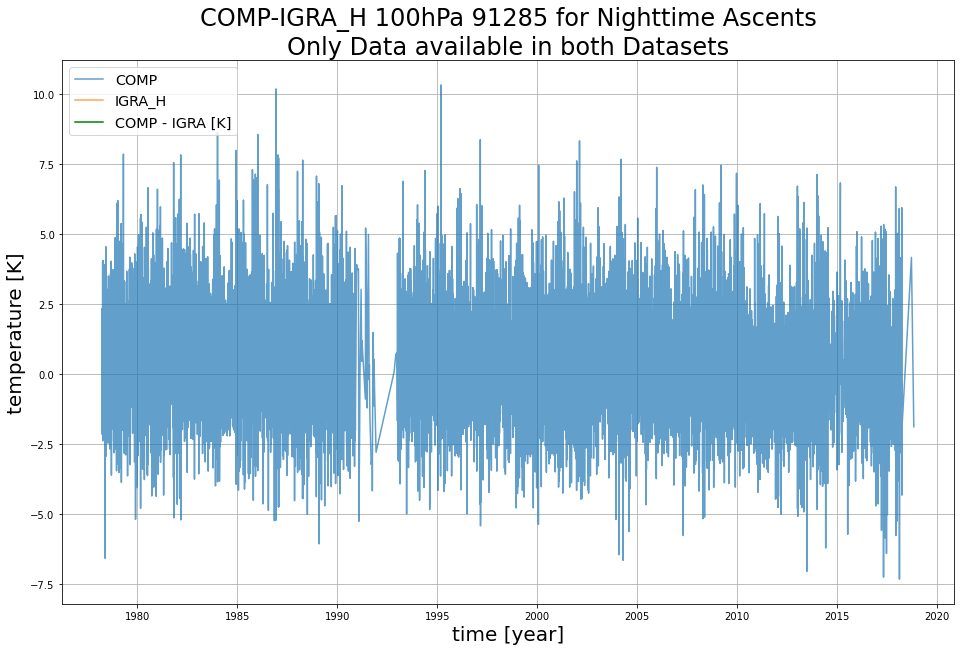

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


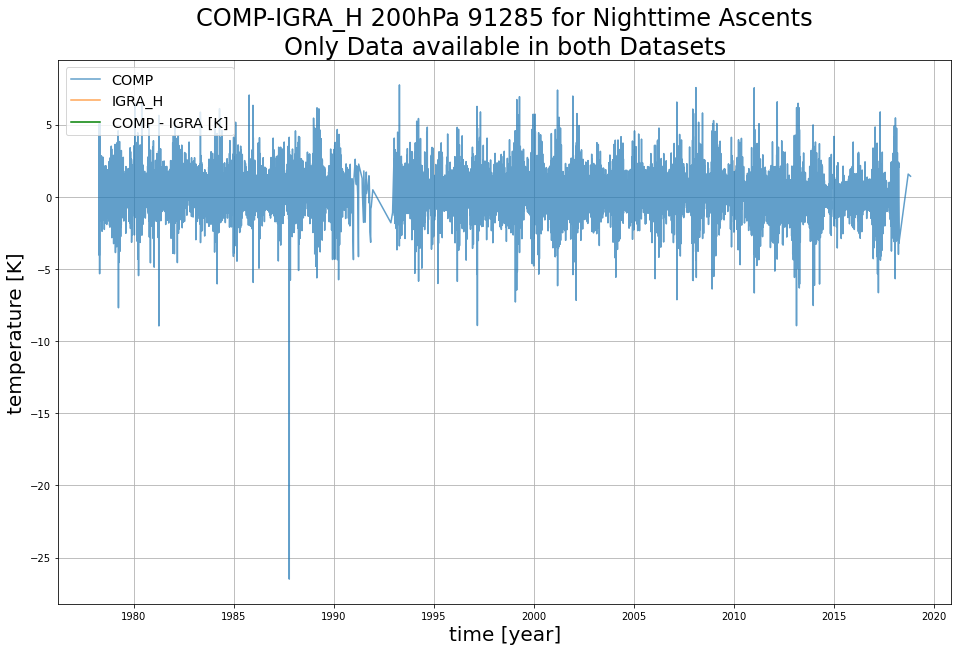

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


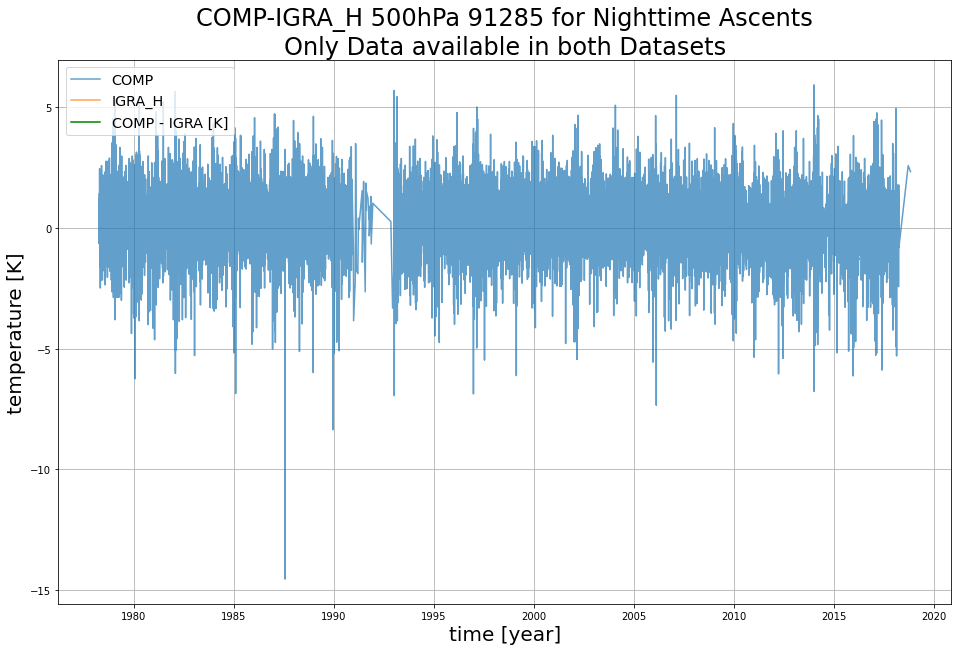

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


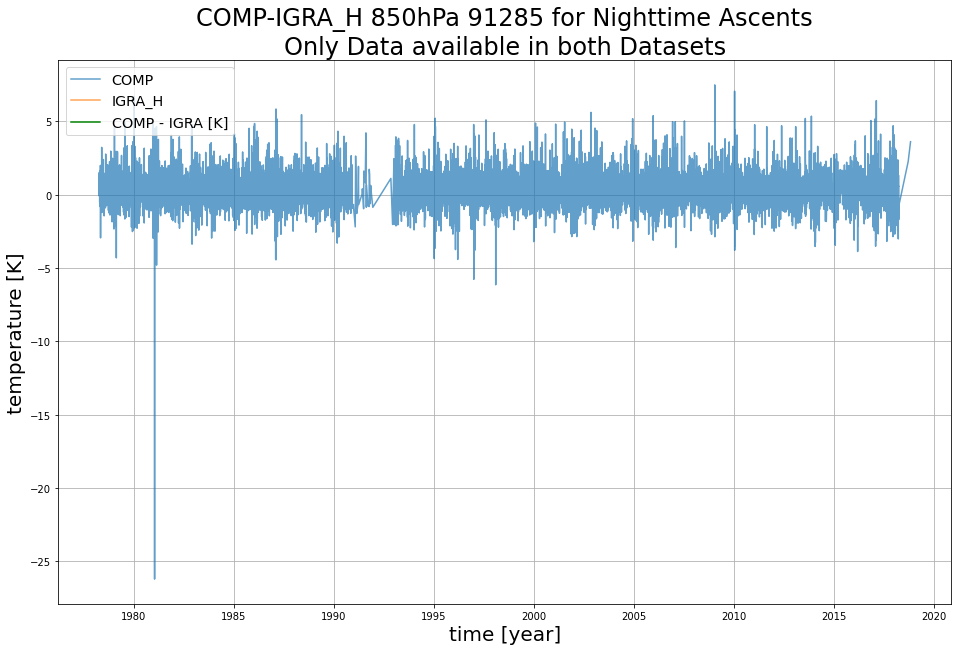

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


In [26]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

## Distribution of Adjustments

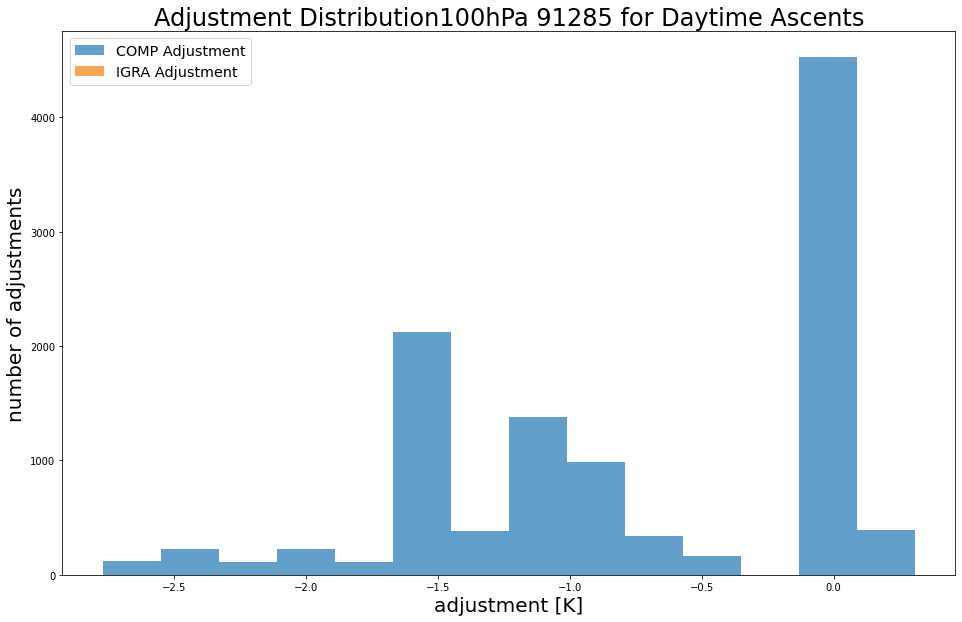

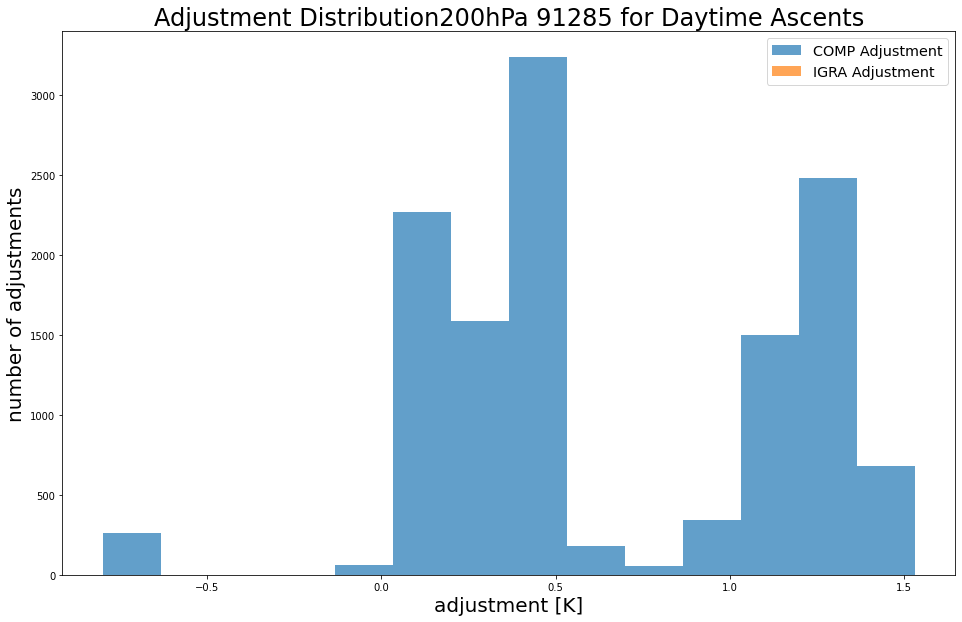

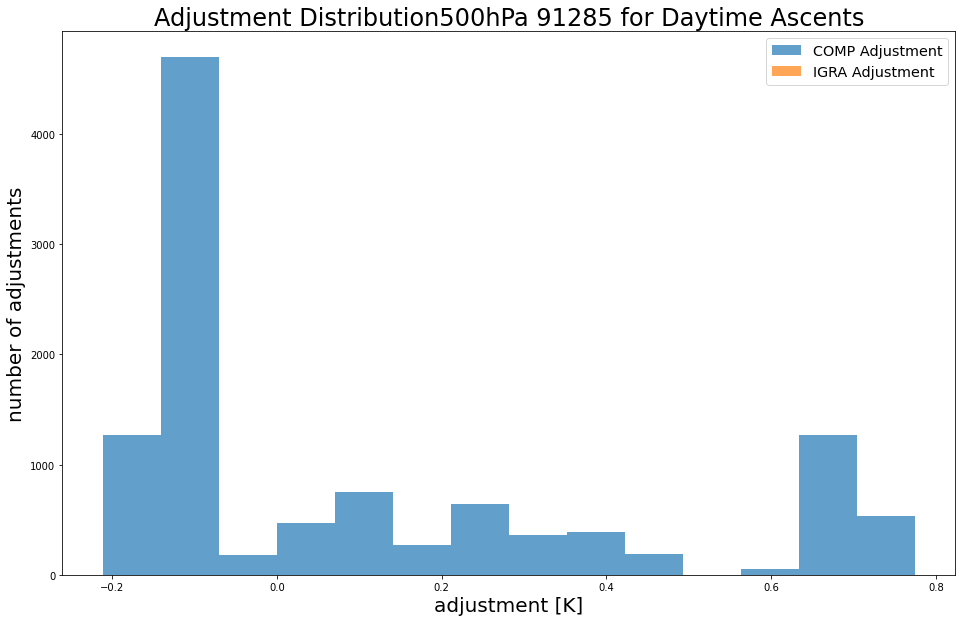

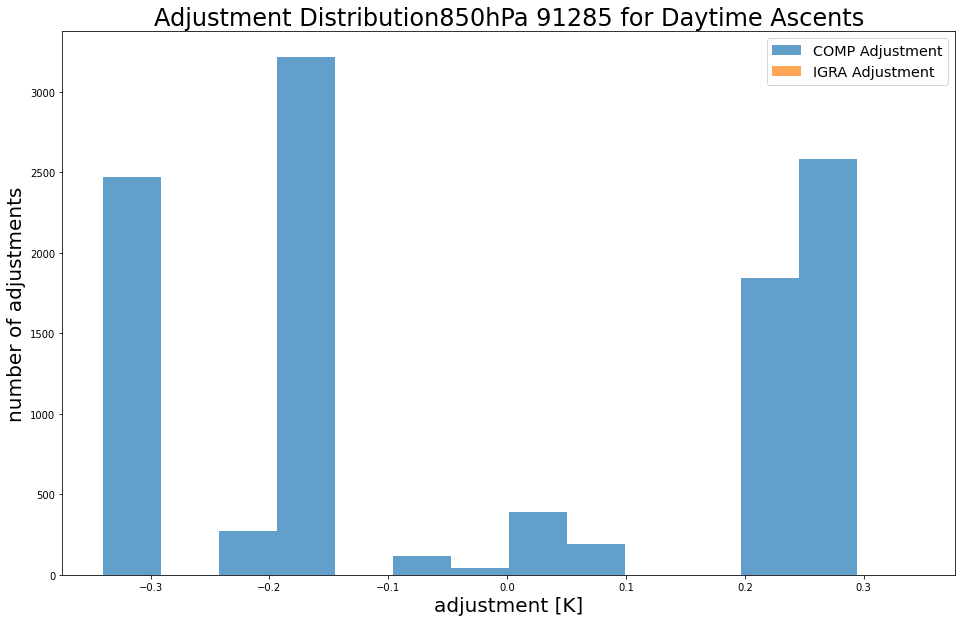

In [27]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if np.nanmin(ia) < np.nanmin(ca): binmin = np.nanmin(ia)
    else: binmin = np.nanmin(ca)
    if np.nanmax(ia) > np.nanmax(ca): binmax = np.nanmax(ia)
    else: binmax = np.nanmax(ca)
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)
    
    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment Distribution'+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

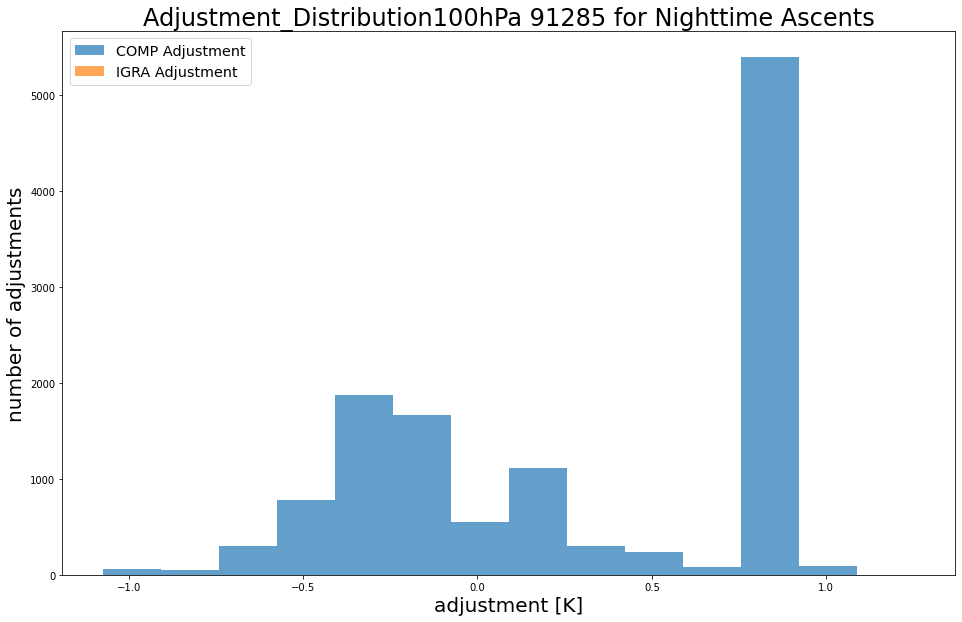

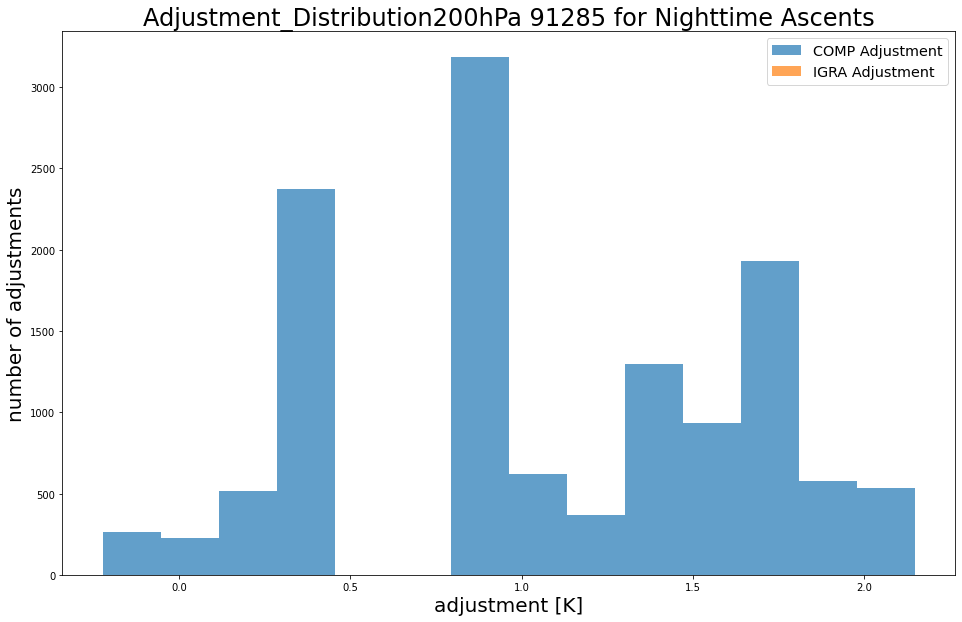

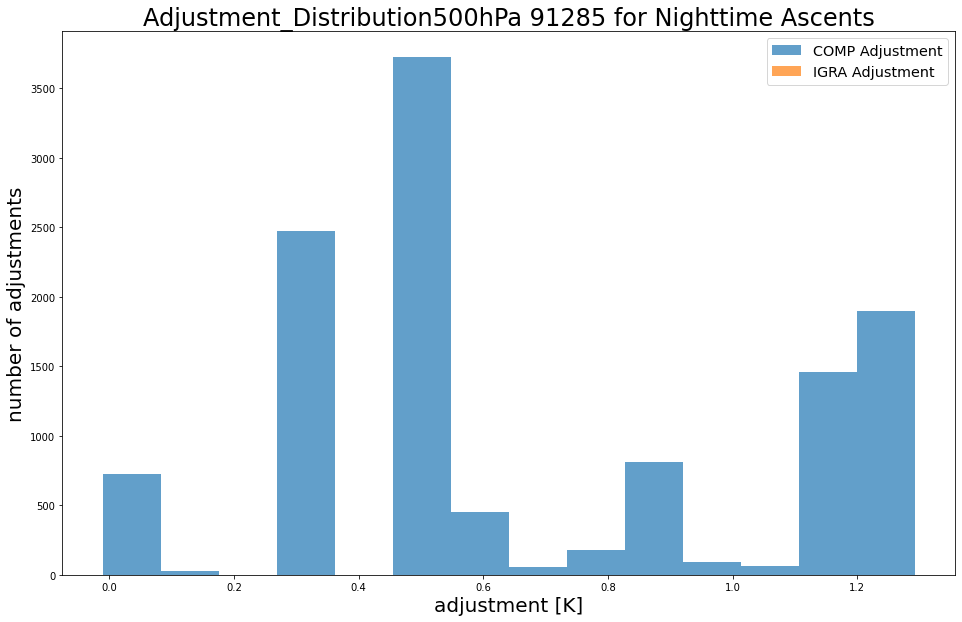

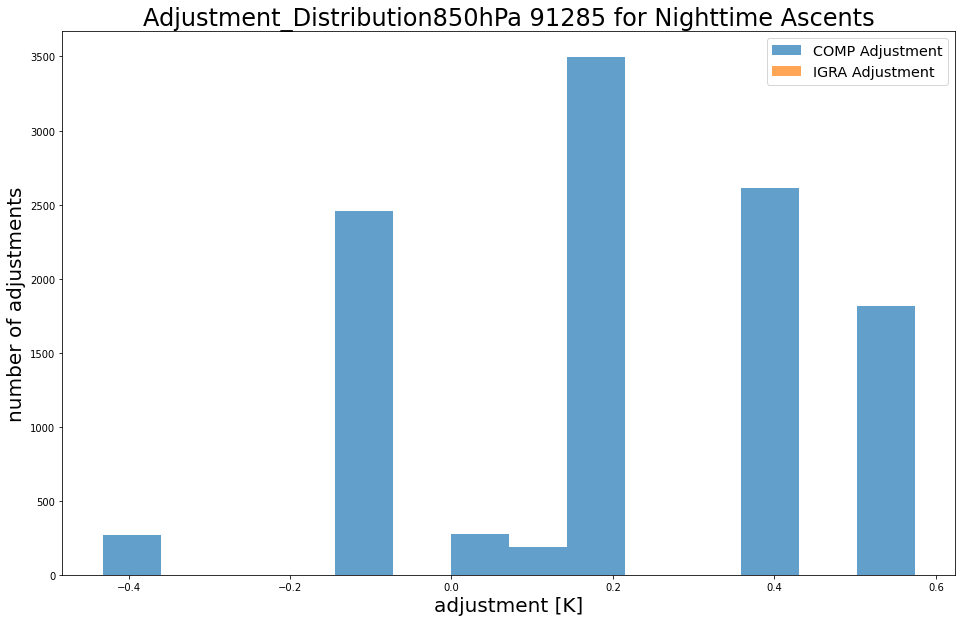

In [28]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if np.nanmin(ia) < np.nanmin(ca): binmin = np.nanmin(ia)
    else: binmin = np.nanmin(ca)
    if np.nanmax(ia) > np.nanmax(ca): binmax = np.nanmax(ia)
    else: binmax = np.nanmax(ca)
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)

    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment_Distribution'+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)